<h1 style="color: ; text-align: center; font-weight: bold;"> 🍫 Chocolate Dataset Analysis 🍫</h1> 
<p style="font-size: 16px; text-align: center; font-weight: bold;">An in-depth analysis of chocolate quality.</p>

### **Objectives**



1. Research and gather data on chocolate.

2. Perform data cleaning and preprocessing to ensure high data quality for analysis.

3. Conduct exploratory data analysis (EDA) to visualize and identify key features influencing chocolate quality ratings.

4. Implement clustering algorithms to identify patterns and groups within the data, assessing different chocolate characteristics.

5. Develop predictive models with machine learning techniques (eg. Decision Trees, Naïve Bayes, and Linear Regression etc.) to estimate chocolate quality and analyze how these models compare in performance.

6. Explore neural network architectures (e.g., MLPs) to enhance prediction accuracy, comparing their performance with traditional models.

Each of these steps utilizes Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for plotting, Scikit-learn for modeling, and other specialized libraries as necessary.

### **Data Description**



#### **Current Features of the dataset:**

**ref:** Reference ID for the chocolate

**company:** Name of the chocolate company

**company_location:** Location of the company

**review_date:** Year of the review

**country_of_bean_origin:** Origin of the cocoa beans

**specific_bean_origin_or_bar_name:** Specific name of the bean origin or bar

**cocoa_percent:** Percentage of cocoa

**rating:** Rating of the chocolate

**counts_of_ingredients:** Number of ingredients

**beans:** Presence of beans

**cocoa_butter:** Presence of cocoa butter

**vanilla:** Presence of vanilla

**lecithin:** Presence of lecithin

**salt:** Presence of salt

**sugar:** Presence of sugar

**sweetener_without_sugar:** Presence of sweeteners without sugar

**first_taste:** Description of the first taste

**second_taste:** Description of the second taste

**third_taste:** Description of the third taste

**fourth_taste:** Description of the fourth taste

### **Problem Statement**

The quality of chocolate, particularly its flavor and market value, is closely tied to factors such as cocoa bean origin, ingredient composition, and production practices. However, understanding the elements that contribute to chocolate quality remains a challenge for producers and consumers. This project aims to analyze the relationships between cocoa percentage, flavor profiles, and expert ratings to identify key predictors of chocolate quality using machine learning techniques for predictive modeling and clustering algorithms

### **Methodology**

This analysis is structured around several key statistical and machine learning techniques aimed at extracting meaningful insights from the coffee quality dataset. The steps are as follows:

**Data Preparation:** Cleaning the data to handle missing values, outliers, and categorical variables. This ensures that the dataset is ready for analysis and modeling.

**Exploratory Data Analysis (EDA):** Employing visual and quantitative methods to understand the distribution of key variables and the relationships between them.

**Modeling:** Applying clustering techniques to segment the coffee types based on quality metrics.

**Evaluation:** Assessing the models using appropriate metrics to ensure robustness and accuracy.

**Visualization:** Using graphs and charts to present the findings in an accessible and understandable form.

**Interpretation and Reporting:** Drawing conclusions from our analyses and modeling, discussing the implications of our findings, and suggesting possible actions based on these insights.

Each of these steps utilizes Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for plotting, Scikit-learn for modeling, and other specialized libraries as necessary.

### **Step 1: Load and Inspect the Data**

In [2371]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore

In [2372]:
# Load the chocolate dataset
data = pd.read_csv('../data/chocolate.csv')

In [2373]:
# Display the first 10 records of the dataset 
data.head(10)

Unnamed: 0   ref   company company_location  review_date  \
0           0  2454      5150            U.S.A         2019   
1           1  2458      5150            U.S.A         2019   
2           2  2454      5150            U.S.A         2019   
3           3   797  A. Morin           France         2012   
4           4   797  A. Morin           France         2012   
5           5  1015  A. Morin           France         2013   
6           6  1019  A. Morin           France         2013   
7           7  1011  A. Morin           France         2013   
8           8  1019  A. Morin           France         2013   
9           9  1011  A. Morin           France         2013   

  country_of_bean_origin specific_bean_origin_or_bar_name  cocoa_percent  \
0             Madagascar           Bejofo Estate, batch 1           76.0   
1     Dominican republic                  Zorzal, batch 1           76.0   
2               Tanzania            Kokoa Kamili, batch 1           76.0   
3                   Peru                             Peru           63.0   
4                Bolivia                          Bolivia           70.0   
5              Venezuela                            Chuao           70.0   
6                   Peru             Chanchamayo Province           63.0   
7                Ecuador                         Equateur           70.0   
8                   Peru             Chanchamayo Province           70.0   
9                 Brazil                           Brazil           70.0   

   rating  counts_of_ingredients  ...       cocoa_butter          vanilla  \
0    3.75                      3  ...  have_cocoa_butter  have_not_vanila   
1    3.50                      3  ...  have_cocoa_butter  have_not_vanila   
2    3.25                      3  ...  have_cocoa_butter  have_not_vanila   
3    3.75                      4  ...  have_cocoa_butter  have_not_vanila   
4    3.50                      4  ...  have_cocoa_butter  have_not_vanila   
5    4.00                      4  ...  have_cocoa_butter  have_not_vanila   
6    4.00                      3  ...  have_cocoa_butter  have_not_vanila   
7    3.75                      4  ...  have_cocoa_butter  have_not_vanila   
8    3.50                      4  ...  have_cocoa_butter  have_not_vanila   
9    3.25                      4  ...  have_cocoa_butter  have_not_vanila   

            lecithin           salt       sugar  \
0  have_not_lecithin  have_not_salt  have_sugar   
1  have_not_lecithin  have_not_salt  have_sugar   
2  have_not_lecithin  have_not_salt  have_sugar   
3      have_lecithin  have_not_salt  have_sugar   
4      have_lecithin  have_not_salt  have_sugar   
5      have_lecithin  have_not_salt  have_sugar   
6  have_not_lecithin  have_not_salt  have_sugar   
7      have_lecithin  have_not_salt  have_sugar   
8      have_lecithin  have_not_salt  have_sugar   
9      have_lecithin  have_not_salt  have_sugar   

            sweetener_without_sugar   first_taste second_taste  \
0  have_not_sweetener_without_sugar         cocoa   blackberry   
1  have_not_sweetener_without_sugar         cocoa      vegetal   
2  have_not_sweetener_without_sugar    rich cocoa        fatty   
3  have_not_sweetener_without_sugar        fruity        melon   
4  have_not_sweetener_without_sugar       vegetal        nutty   
5  have_not_sweetener_without_sugar          oily          nut   
6  have_not_sweetener_without_sugar         sweet        cocoa   
7  have_not_sweetener_without_sugar         sandy        nutty   
8  have_not_sweetener_without_sugar         cocoa         sour   
9  have_not_sweetener_without_sugar  mild tobacco          NaN   

         third_taste fourth_taste  
0          full body          NaN  
1             savory          NaN  
2             bready          NaN  
3             roasty          NaN  
4                NaN          NaN  
5            caramel    raspberry  
6          tangerine          NaN  
7              cocoa          fig  
8  intense 

In [2374]:
# Display the last 5 records of the dataset
data.tail()

Unnamed: 0   ref company company_location  review_date  \
2219        2219  1205  Zotter          Austria         2014   
2220        2220  1996  Zotter          Austria         2017   
2221        2221  2170  Zotter          Austria         2018   
2222        2222  2170  Zotter          Austria         2018   
2223        2223  2036  Zotter          Austria         2018   

     country_of_bean_origin specific_bean_origin_or_bar_name  cocoa_percent  \
2219                  Blend                              Raw           80.0   
2220               Colombia                 APROCAFA, Acandi           75.0   
2221                 Belize                         Maya Mtn           72.0   
2222                  Congo            Mountains of the Moon           70.0   
2223                  Blend  Dry Aged, 30 yr Anniversary bar           75.0   

      rating  counts_of_ingredients  ...       cocoa_butter          vanilla  \
2219    2.75                      4  ...  have_cocoa_butter  have_not_vanila   
2220    3.75                      3  ...  have_cocoa_butter  have_not_vanila   
2221    3.50                      3  ...  have_cocoa_butter  have_not_vanila   
2222    3.25                      3  ...  have_cocoa_butter  have_not_vanila   
2223    3.00                      3  ...  have_cocoa_butter  have_not_vanila   

               lecithin           salt           sugar  \
2219  have_not_lecithin      have_salt  have_not_sugar   
2220  have_not_lecithin  have_not_salt      have_sugar   
2221  have_not_lecithin  have_not_salt      have_sugar   
2222  have_not_lecithin  have_not_salt      have_sugar   
2223  have_not_lecithin  have_not_salt      have_sugar   

               sweetener_without_sugar   first_taste second_taste third_taste  \
2219      have_sweetener_without_sugar          waxy      cloying     vegetal   
2220  have_not_sweetener_without_sugar  strong nutty  marshmallow         NaN   
2221  have_not_sweetener_without_sugar         muted       roasty  accessible   
2222  have_not_sweetener_without_sugar         fatty    mild nuts  mild fruit   
2223  have_not_sweetener_without_sugar         fatty       earthy       cocoa   

     fourth_taste  
2219          NaN  
2220          NaN  
2221          NaN  
2222          NaN  
2223          NaN  

[5 rows x 21 columns]

In [2375]:
# Print the number of records in the dataset
print("Number of Records: ",data.shape[0])

# Print the number of features in the dataset
print ("Number of Features: ",data.shape[1])

# Display information about the dataset
data.info()

Number of Records:  2224
Number of Features:  21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter        

### **Step 2: Data Cleaning** 


#### **1. Dropping unnecessary column**

In [2376]:
# Drop unnecessary columns from the datase

# 'Unnamed: 0', 'ref', 'company', 'review_date', and 'specific_bean_origin_or_bar_name' are removed
# 'axis=1' indicates we are dropping columns 
# 'inplace=True' modifies the dataset directly without returning a new DataFrame
data.drop(['Unnamed: 0','ref','company','review_date', 'specific_bean_origin_or_bar_name'], axis=1, inplace=True)

In [2377]:
# Display the first five rows after dropping unnecessary columns 
data.head()

company_location country_of_bean_origin  cocoa_percent  rating  \
0            U.S.A             Madagascar           76.0    3.75   
1            U.S.A     Dominican republic           76.0    3.50   
2            U.S.A               Tanzania           76.0    3.25   
3           France                   Peru           63.0    3.75   
4           France                Bolivia           70.0    3.50   

   counts_of_ingredients      beans       cocoa_butter          vanilla  \
0                      3  have_bean  have_cocoa_butter  have_not_vanila   
1                      3  have_bean  have_cocoa_butter  have_not_vanila   
2                      3  have_bean  have_cocoa_butter  have_not_vanila   
3                      4  have_bean  have_cocoa_butter  have_not_vanila   
4                      4  have_bean  have_cocoa_butter  have_not_vanila   

            lecithin           salt       sugar  \
0  have_not_lecithin  have_not_salt  have_sugar   
1  have_not_lecithin  have_not_salt  have_sugar   
2  have_not_lecithin  have_not_salt  have_sugar   
3      have_lecithin  have_not_salt  have_sugar   
4      have_lecithin  have_not_salt  have_sugar   

            sweetener_without_sugar first_taste second_taste third_taste  \
0  have_not_sweetener_without_sugar       cocoa   blackberry   full body   
1  have_not_sweetener_without_sugar       cocoa      vegetal      savory   
2  have_not_sweetener_without_sugar  rich cocoa        fatty      bready   
3  have_not_sweetener_without_sugar      fruity        melon      roasty   
4  have_not_sweetener_without_sugar     vegetal        nutty         NaN   

  fourth_taste  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

## **This notebook will not be considering the flavour profile for experiment purposes**

In [2378]:
# Drop the flavor profile columns
data = data.drop(['first_taste', 'second_taste', 'third_taste', 'fourth_taste'], axis=1)
data.head()

company_location country_of_bean_origin  cocoa_percent  rating  \
0            U.S.A             Madagascar           76.0    3.75   
1            U.S.A     Dominican republic           76.0    3.50   
2            U.S.A               Tanzania           76.0    3.25   
3           France                   Peru           63.0    3.75   
4           France                Bolivia           70.0    3.50   

   counts_of_ingredients      beans       cocoa_butter          vanilla  \
0                      3  have_bean  have_cocoa_butter  have_not_vanila   
1                      3  have_bean  have_cocoa_butter  have_not_vanila   
2                      3  have_bean  have_cocoa_butter  have_not_vanila   
3                      4  have_bean  have_cocoa_butter  have_not_vanila   
4                      4  have_bean  have_cocoa_butter  have_not_vanila   

            lecithin           salt       sugar  \
0  have_not_lecithin  have_not_salt  have_sugar   
1  have_not_lecithin  have_not_salt  have_sugar   
2  have_not_lecithin  have_not_salt  have_sugar   
3      have_lecithin  have_not_salt  have_sugar   
4      have_lecithin  have_not_salt  have_sugar   

            sweetener_without_sugar  
0  have_not_sweetener_without_sugar  
1  have_not_sweetener_without_sugar  
2  have_not_sweetener_without_sugar  
3  have_not_sweetener_without_sugar  
4  have_not_sweetener_without_sugar

#### **2. Handling Missing values**

In [2379]:
# Count missing values in each column
data.isna().sum()

company_location           0
country_of_bean_origin     0
cocoa_percent              0
rating                     0
counts_of_ingredients      0
beans                      0
cocoa_butter               0
vanilla                    0
lecithin                   0
salt                       0
sugar                      0
sweetener_without_sugar    0
dtype: int64

#### **3. Checking for duplicate records**

In [2380]:
# Identify the duplicate rows
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows
duplicate_rows


company_location country_of_bean_origin  cocoa_percent  rating  \
22             France                   Peru           70.0    3.50   
26             France                   Peru           63.0    3.75   
27             France              Venezuela           70.0    3.50   
29              U.S.A                   Peru           70.0    3.75   
38            Vanuatu                Vanuatu           70.0    2.75   
...               ...                    ...            ...     ...   
2174            U.S.A                Ecuador           70.0    3.25   
2182            U.S.A                 Belize           70.0    3.50   
2183            U.S.A     Dominican republic           70.0    3.25   
2184            U.S.A             Madagascar           70.0    3.25   
2185            U.S.A                   Peru           70.0    3.25   

      counts_of_ingredients      beans           cocoa_butter  \
22                        4  have_bean      have_cocoa_butter   
26                        4  have_bean      have_cocoa_butter   
27                        4  have_bean      have_cocoa_butter   
29                        2  have_bean  have_not_cocoa_butter   
38                        2  have_bean  have_not_cocoa_butter   
...                     ...        ...                    ...   
2174                      2  have_bean  have_not_cocoa_butter   
2182                      3  have_bean      have_cocoa_butter   
2183                      3  have_bean      have_cocoa_butter   
2184                      3  have_bean      have_cocoa_butter   
2185                      3  have_bean      have_cocoa_butter   

              vanilla           lecithin           salt       sugar  \
22    have_not_vanila      have_lecithin  have_not_salt  have_sugar   
26    have_not_vanila      have_lecithin  have_not_salt  have_sugar   
27    have_not_vanila      have_lecithin  have_not_salt  have_sugar   
29    have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   
38    have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   
...               ...                ...            ...         ...   
2174  have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   
2182  have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   
2183  have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   
2184  have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   
2185  have_not_vanila  have_not_lecithin  have_not_salt  have_sugar   

               sweetener_without_sugar  
22    have_not_sweetener_without_sugar  
26    have_not_sweetener_without_sugar  
27    have_not_sweetener_without_sugar  
29    have_not_sweetener_without_sugar  
38    have_not_sweetener_without_sugar  
...                                ...  
2174  have_not_sweetener_without_sugar  
2182  have_not_sweetener_without_sugar  
2183  have_not_sweetener_without_sugar  
2184  have_not_sweetener_without_sugar  
2185  have_not_sweetener_without_sugar  

[319 rows x 12 columns]

In [2381]:
# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)

In [2382]:
# Count the number of duplicate rows in the dataset
data.duplicated().sum()

np.int64(0)

#### **4. Converting datatypes**

In [2383]:
data.head()

company_location country_of_bean_origin  cocoa_percent  rating  \
0            U.S.A             Madagascar           76.0    3.75   
1            U.S.A     Dominican republic           76.0    3.50   
2            U.S.A               Tanzania           76.0    3.25   
3           France                   Peru           63.0    3.75   
4           France                Bolivia           70.0    3.50   

   counts_of_ingredients      beans       cocoa_butter          vanilla  \
0                      3  have_bean  have_cocoa_butter  have_not_vanila   
1                      3  have_bean  have_cocoa_butter  have_not_vanila   
2                      3  have_bean  have_cocoa_butter  have_not_vanila   
3                      4  have_bean  have_cocoa_butter  have_not_vanila   
4                      4  have_bean  have_cocoa_butter  have_not_vanila   

            lecithin           salt       sugar  \
0  have_not_lecithin  have_not_salt  have_sugar   
1  have_not_lecithin  have_not_salt  have_sugar   
2  have_not_lecithin  have_not_salt  have_sugar   
3      have_lecithin  have_not_salt  have_sugar   
4      have_lecithin  have_not_salt  have_sugar   

            sweetener_without_sugar  
0  have_not_sweetener_without_sugar  
1  have_not_sweetener_without_sugar  
2  have_not_sweetener_without_sugar  
3  have_not_sweetener_without_sugar  
4  have_not_sweetener_without_sugar

Note: Here you can notice how the columns beans, cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar are simply indicating a yes or no value. Thus these can be converted into boolean datatype.

From the values we can understand that have_not represents the absence of the ingredient (False) and have_ represents the presence of the ingredient (True).

In [2384]:
# Function to convert to boolean type
def convert_to_binary(x):
    if 'have_not' in x:
        return 0
    elif 'have_' in x:
        return 1
    else:
        return  None # if the value is missing (even though we have already handled missing values)

In [2385]:
# Checking old values to ensure that no other types of values are present for 'beans' feature
data.beans.value_counts()

beans
have_bean    1905
Name: count, dtype: int64

In [2386]:
# Checking old values to ensure that no other types of values are present for 'cocoa_butter' feature
data.cocoa_butter.value_counts()

cocoa_butter
have_cocoa_butter        1357
have_not_cocoa_butter     548
Name: count, dtype: int64

In [2387]:
# Checking old values to ensure that no other types of values are present for 'vanilla' feature
data.vanilla.value_counts()

vanilla
have_not_vanila    1574
have_vanila         331
Name: count, dtype: int64

In [2388]:
# Checking old values to ensure that no other types of values are present for 'lecithin' feature
data.lecithin.value_counts()

lecithin
have_not_lecithin    1448
have_lecithin         457
Name: count, dtype: int64

In [2389]:
# Checking old values to ensure that no other types of values are present for 'salt' feature
data.salt.value_counts()

salt
have_not_salt    1868
have_salt          37
Name: count, dtype: int64

In [2390]:
# Checking old values to ensure that no other types of values are present for 'sugar' feature
data.sugar.value_counts()

sugar
have_sugar        1823
have_not_sugar      82
Name: count, dtype: int64

In [2391]:
# Checking old values to ensure that no other types of values are present for 'sweetener_without_sugar' feature
data.sweetener_without_sugar.value_counts()

sweetener_without_sugar
have_not_sweetener_without_sugar    1829
have_sweetener_without_sugar          76
Name: count, dtype: int64

In [2392]:
# Apply the function to 'beans'
data['beans'] = data['beans'].apply(convert_to_binary)

# Identify if 'beans' is present in the chocolate or not
data.beans.value_counts()

beans
1    1905
Name: count, dtype: int64

In [2393]:
# Apply the function to 'cocoa_butter'
data['cocoa_butter'] = data['cocoa_butter'].apply(convert_to_binary)

# Identify if 'cocoa_butter' is present in the chocolate or not
data.cocoa_butter.value_counts()

cocoa_butter
1    1357
0     548
Name: count, dtype: int64

In [2394]:
# Apply the function to 'vanilla'
data['vanilla'] = data['vanilla'].apply(convert_to_binary)

# Identify if 'vanilla' is present in the chocolate or not
data.vanilla.value_counts()

vanilla
0    1574
1     331
Name: count, dtype: int64

In [2395]:
# Apply the function to 'lecithin'
data['lecithin'] = data['lecithin'].apply(convert_to_binary)

# Identify if 'lecithin' is present in the chocolate or not
data.lecithin.value_counts()

lecithin
0    1448
1     457
Name: count, dtype: int64

In [2396]:
# Apply the function to 'salt'
data['salt'] = data['salt'].apply(convert_to_binary)

# Identify if 'salt' is present in the chocolate or not
data.salt.value_counts()

salt
0    1868
1      37
Name: count, dtype: int64

In [2397]:
# Apply the function to 'sugar'
data['sugar'] = data['sugar'].apply(convert_to_binary)

# Identify if 'sugar' is present in the chocolate or not
data.sugar.value_counts()

sugar
1    1823
0      82
Name: count, dtype: int64

In [2398]:
# Apply the function to 'sweetener_without_sugar'
data['sweetener_without_sugar'] = data['sweetener_without_sugar'].apply(convert_to_binary)

# Identify if 'sweetener_without_sugar' is present in the chocolate or not
data.sweetener_without_sugar.value_counts()

sweetener_without_sugar
0    1829
1      76
Name: count, dtype: int64

In [2399]:
data.head()

company_location country_of_bean_origin  cocoa_percent  rating  \
0            U.S.A             Madagascar           76.0    3.75   
1            U.S.A     Dominican republic           76.0    3.50   
2            U.S.A               Tanzania           76.0    3.25   
3           France                   Peru           63.0    3.75   
4           France                Bolivia           70.0    3.50   

   counts_of_ingredients  beans  cocoa_butter  vanilla  lecithin  salt  sugar  \
0                      3      1             1        0         0     0      1   
1                      3      1             1        0         0     0      1   
2                      3      1             1        0         0     0      1   
3                      4      1             1        0         1     0      1   
4                      4      1             1        0         1     0      1   

   sweetener_without_sugar  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

#### **5. Classifying Ratings into Quality Categories**

| **Rating Category**     | **Score Range** |
|--------------------------|-----------------|
| Outstanding             | 4.0 to 5.0      |
| Highly Recommended      | 3.5 to 3.9      |
| Recommended             | 3.0 to 3.49     |
| Disappointing           | 2.0 to 2.9      |
| Unpleasant              | 1.0 to 1.99     |


In [2400]:
# Define a function to classify ratings into quality categories
def ratings_to_quality(rating):
    if rating >= 4.0:
        return 'Outstanding' # For ratings 4.0 and above
    elif 3.5 <= rating < 4.0:
        return 'Highly Recommended' # For ratings between 3.5 and 4.0
    elif 3.0 <= rating < 3.5:
        return 'Recommended' # For ratings between 3.0 and 3.5
    elif 2.0 <= rating < 3.0:
        return 'Disappointing' # For ratings between 2.0 and 3.0
    elif 1.0 <= rating < 2.0:
        return 'Unpleasant' # For ratings between 1.0 and 2.0
    else:
        return 'Invalid Rating'  # For ratings outside the expected range


In [2401]:
# Apply the 'ratings_to_quality' function to the 'rating' column
# Create a new column 'Quality' to store the categorized quality values
data['Quality'] = data['rating'].apply(ratings_to_quality)

In [2402]:
# Display the first 5 rows of the 'rating' and 'Quality' columns
data[['rating','Quality']].head()

rating             Quality
0    3.75  Highly Recommended
1    3.50  Highly Recommended
2    3.25         Recommended
3    3.75  Highly Recommended
4    3.50  Highly Recommended

### **Step 3: Exploratory Data Analysis with Visualizations**

#### **1. Data Overview and Summary Statistics**

In [2403]:
# Generate descriptive statistics for the numerical columns in the dataset
data.describe()

cocoa_percent       rating  counts_of_ingredients   beans  \
count    1905.000000  1905.000000            1905.000000  1905.0   
mean       71.625984     3.180236               3.142257     1.0   
std         5.595746     0.444291               0.944480     0.0   
min        42.000000     1.000000               1.000000     1.0   
25%        70.000000     3.000000               2.000000     1.0   
50%        70.000000     3.250000               3.000000     1.0   
75%        75.000000     3.500000               4.000000     1.0   
max       100.000000     4.000000               6.000000     1.0   

       cocoa_butter      vanilla     lecithin         salt        sugar  \
count   1905.000000  1905.000000  1905.000000  1905.000000  1905.000000   
mean       0.712336     0.173753     0.239895     0.019423     0.956955   
std        0.452793     0.378997     0.427131     0.138041     0.203011   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     1.000000   
50%        1.000000     0.000000     0.000000     0.000000     1.000000   
75%        1.000000     0.000000     0.000000     0.000000     1.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       sweetener_without_sugar  
count              1905.000000  
mean                  0.039895  
std                   0.195764  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                   1.000000

In [2404]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1905 entries, 0 to 2223
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_location         1905 non-null   object 
 1   country_of_bean_origin   1905 non-null   object 
 2   cocoa_percent            1905 non-null   float64
 3   rating                   1905 non-null   float64
 4   counts_of_ingredients    1905 non-null   int64  
 5   beans                    1905 non-null   int64  
 6   cocoa_butter             1905 non-null   int64  
 7   vanilla                  1905 non-null   int64  
 8   lecithin                 1905 non-null   int64  
 9   salt                     1905 non-null   int64  
 10  sugar                    1905 non-null   int64  
 11  sweetener_without_sugar  1905 non-null   int64  
 12  Quality                  1905 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage: 208.4+ KB


#### **2. Distribution of Ratings**

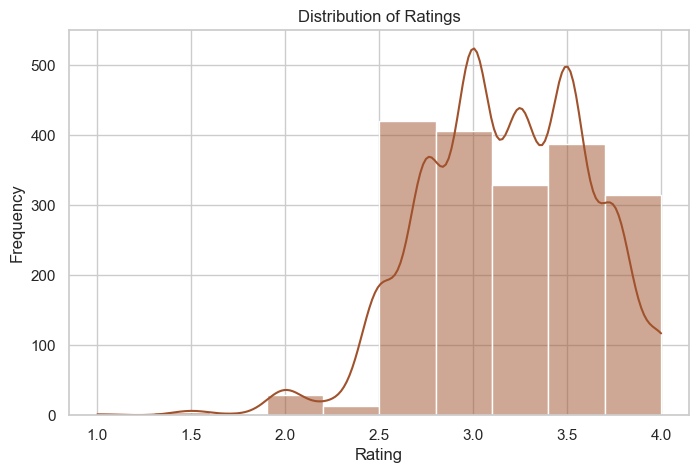

In [2405]:
#Histogram for Distribution of Chocolate Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=10, kde=True, color='sienna') 

# Adding Titles and Labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The histogram of chocolate ratings shows that the majority of ratings are concentrated between **2 and 3**, with a peak around **rating 3**, indicating that most chocolates are rated as average or slightly above average. The distribution is **right-skewed**, with fewer ratings at the extreme ends (1 and 4), suggesting that both very low and very high ratings are less common. This indicates that most reviews tend to be more neutral to positive rather than extremely negative or highly favorable.


#### **3. Checking Class Distribution**

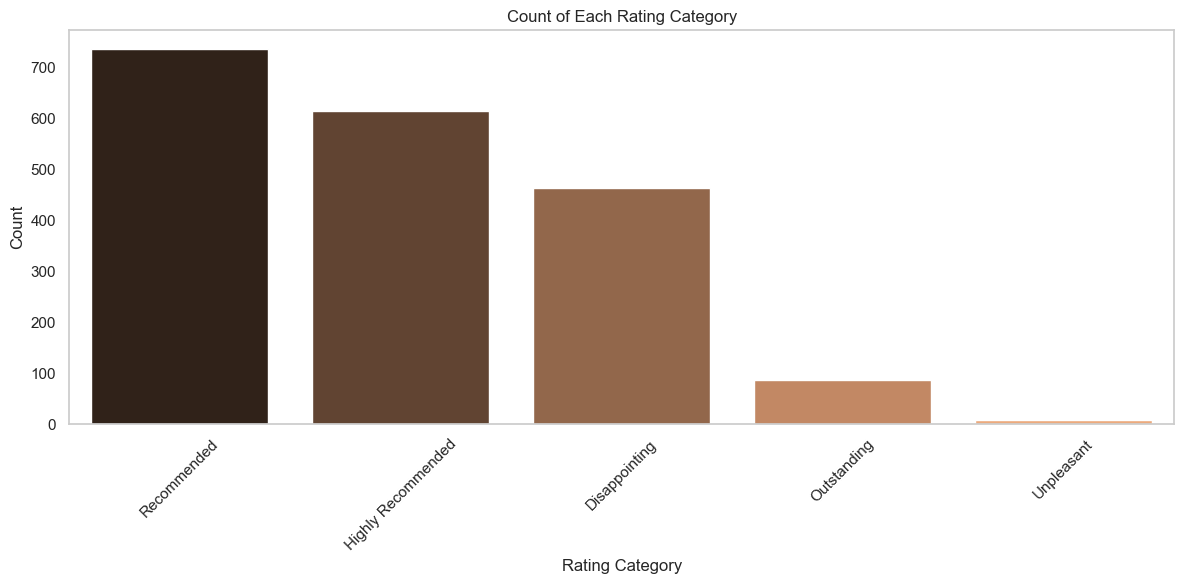

In [2406]:
#Bar plot to show the count of each rating category 
rating_counts = data['Quality'].value_counts().reset_index()
rating_counts.columns = ['Quality', 'count']


plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts, 
            x='Quality', 
            y='count', 
            hue='Quality',
            palette='copper')

# Adding Titles and Labels
plt.title('Count of Each Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

The bar chart displaying the count of each rating category reveals that the majority of chocolates are categorized as either **Recommended** or **Highly Recommended**, with both categories having a high count, indicating positive reviews. The **Disappointing** category also shows a significant count, suggesting that while most chocolates are rated positively, there is still a portion of chocolates receiving lower ratings. The **Outstanding** and **Unpleasant** categories have very low counts, with **Unpleasant** being particularly low. As a result, due to its very low frequency, the **Unpleasant** category was dropped from the analysis.


#### **4. Distribution of Cocoa Percent**

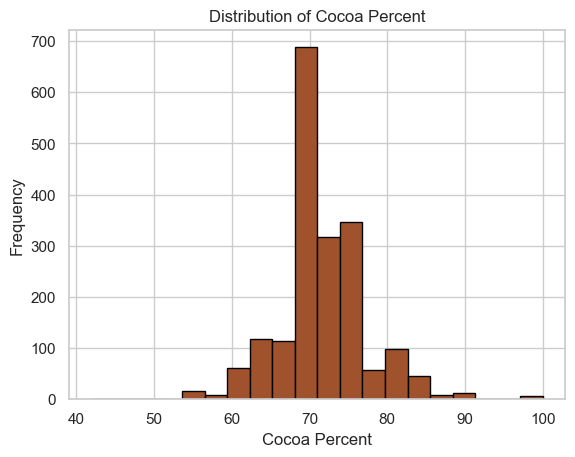

In [ ]:
# Histogram for cocoa_percent
plt.hist(data['cocoa_percent'], bins=20,color='sienna' ,edgecolor='k')
plt.title('Distribution of Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Frequency')
plt.show()

The histogram for the **Distribution of Cocoa Percent** shows that most chocolate products in the dataset have a cocoa content around **70%**, with this category being highly concentrated and representing the majority of the data. The frequency of chocolates with cocoa content between **60% and 80%** is noticeably high, indicating that chocolates with a cocoa percentage in this range are more commonly rated and available in the dataset. The distribution is somewhat skewed to the right, as fewer chocolates fall into the higher cocoa percentage categories (above 80%). This suggests that most chocolates fall within the moderate cocoa range, while higher cocoa percentages are less common.


#### **5. Distribution of Counts of Ingredients**

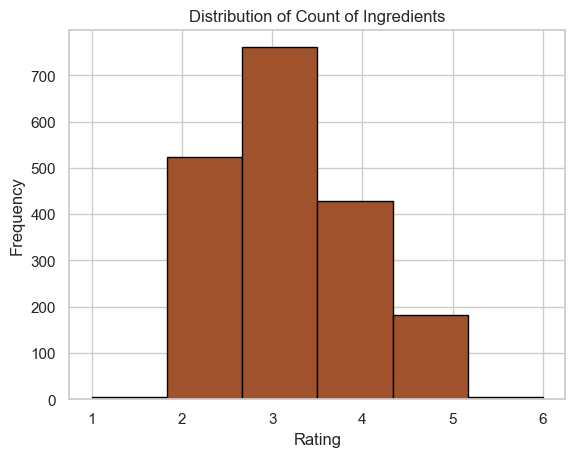

In [2408]:
# Histogram for counts_of_ingredients
plt.hist(data['counts_of_ingredients'], bins=6, color='sienna' ,edgecolor='k')
plt.title('Distribution of Count of Ingredients')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The **Distribution of Count of Ingredients** histogram illustrates the frequency of chocolates based on the number of ingredients used in their production, grouped by ratings. The histogram shows that the majority of chocolates have between **2 and 3 ingredients**. The highest frequency is seen at **3 ingredients**, with a peak around this value. A moderate frequency is observed for chocolates with **2 and 4 ingredients**. The frequency decreases significantly for chocolates with **1 and 5 ingredients**, suggesting that chocolates with a low or high number of ingredients are less common.

This distribution shows that most chocolates in the dataset tend to have a relatively simple ingredient list, often around **3 ingredients**


#### **6. Checking for outliers**

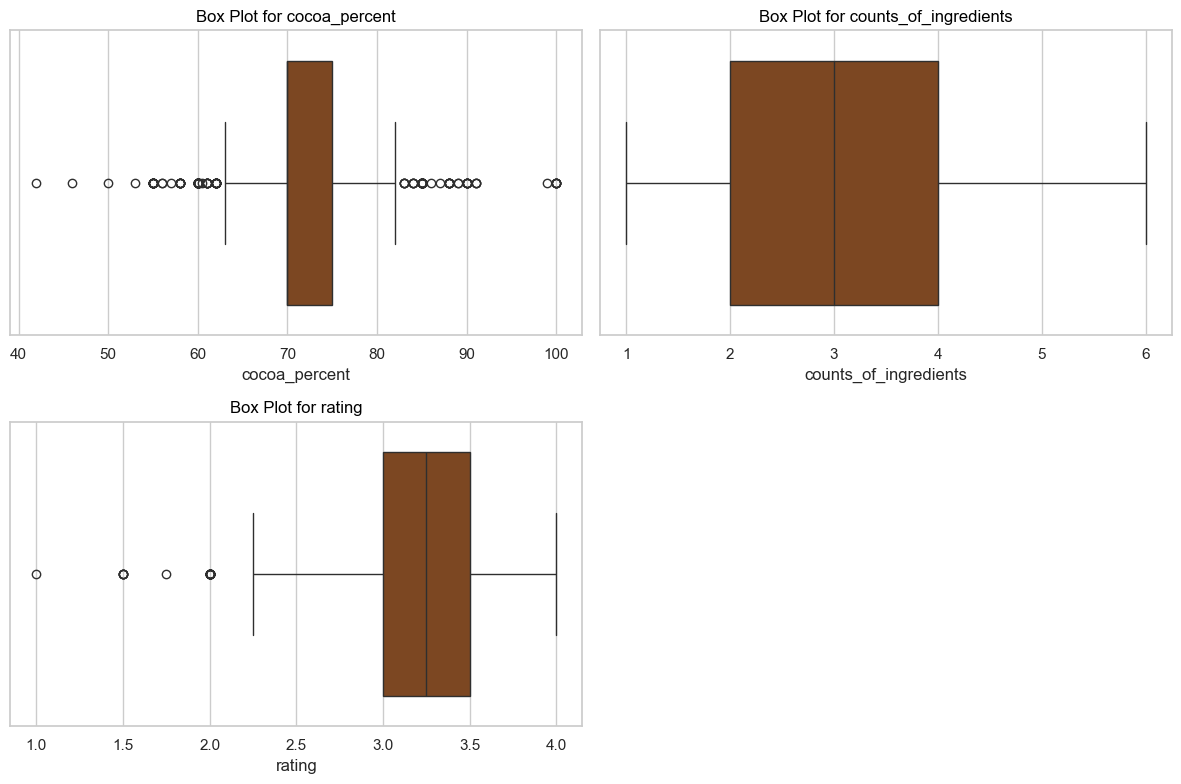

In [2409]:
# Set seaborn style
sns.set(style="whitegrid", palette="copper")  

# Define features for outlier detection
outlier_features = ['cocoa_percent', 'counts_of_ingredients', 'rating']

# Plot box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=feature, color="saddlebrown")  
    plt.title(f'Box Plot for {feature}', color="black")
plt.tight_layout()

# Show the plot
plt.show()

The **box plots** provide a visual summary of the distribution of three key features: **Cocoa Percent**, **Count of Ingredients**, and **Rating**.

1. **Cocoa Percent**:
   - The cocoa percentage in the chocolates is predominantly clustered around **70%**. The box plot shows a large concentration in the interquartile range (IQR) between **60% and 80%**.
   - There are **outliers** at both the lower and upper extremes (indicating some chocolates with lower and higher cocoa percentages).
   - The distribution suggests that chocolates with around 70% cocoa content are most common in the dataset.

2. **Count of Ingredients**:
   - The box plot shows that most chocolates have around **3 ingredients**, with a narrower spread between **2 and 4 ingredients**.
   - There are **outliers** with chocolates containing either fewer or more ingredients, but they are relatively rare.
   - This distribution indicates a preference for chocolates with a moderate ingredient count

3. **Rating**:
   - The ratings for chocolates are heavily concentrated around **3** and **3.5**, with a few outliers at **1** and **2**.
   - The central tendency around **3** suggests that most chocolates are rated as **"Recommended"**.
   - The box plot also shows that there are few chocolates rated poorly (**1 and 2**), confirming the previous findings that most reviews are either **Recommended** or **Highly Recommended**.

In summary, the data shows that most chocolates in the dataset have a cocoa percentage around **70%**, use **3 ingredients**, and are generally rated **Recommended** or **Highly Recommended**. Outliers do exist for each feature but are not the dominant trend.


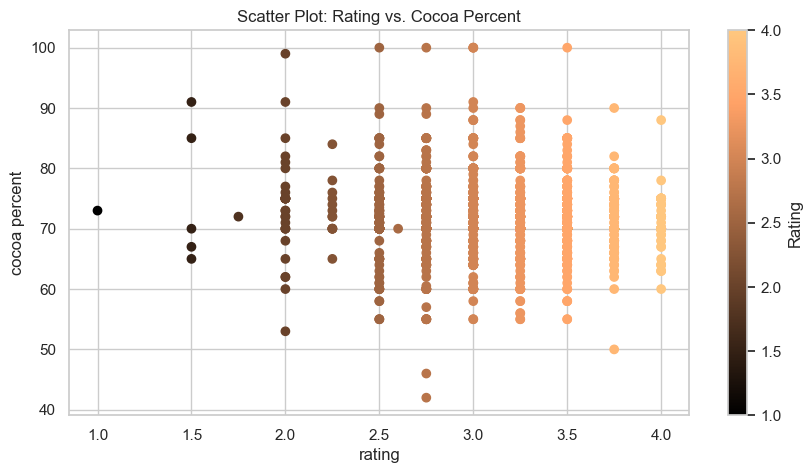

In [2410]:
# Scatter plot for cocoa_percent vs. counts_of_ingredients
plt.figure(figsize=(10, 5))
plt.scatter(data['rating'], data['cocoa_percent'], c=data['rating'], cmap='copper')

# Add axis labels and title
plt.xlabel('rating')
plt.ylabel('cocoa percent')
plt.title('Scatter Plot: Rating vs. Cocoa Percent')

plt.colorbar(label='Rating')

# Show the plot
plt.show()

The scatter plot shows that chocolate with 70-80% cocoa tend to have higher ratings (3 and 4), while lower-rated chocolates are spread across all cocoa percentages.

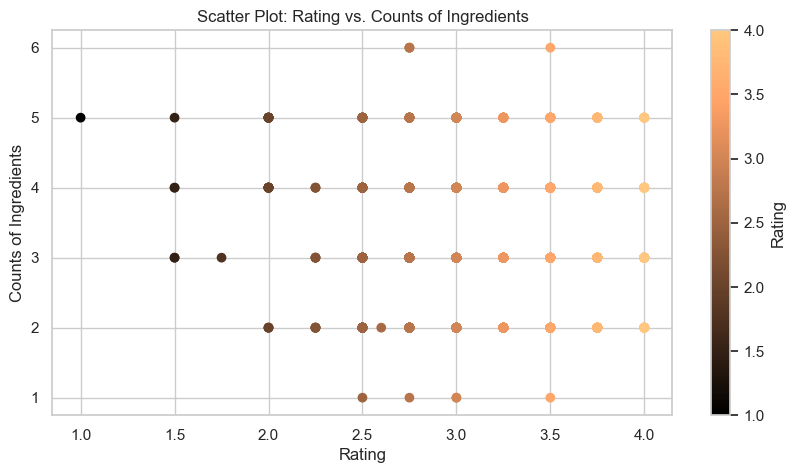

In [2411]:
# Scatter plot for rating vs. counts_of_ingredients
plt.figure(figsize=(10, 5))
plt.scatter(data['rating'], data['counts_of_ingredients'], c=data['rating'], cmap='copper')

# Add axis labels and title
plt.xlabel('Rating')
plt.ylabel('Counts of Ingredients')
plt.title('Scatter Plot: Rating vs. Counts of Ingredients')

plt.colorbar(label='Rating')

# Show the plot
plt.show()

The scatter plot shows that higher ratings (3 and 4) are more frequent in chocolates with 3-5 ingredients, while chocolates with fewer ingredients (1-2) have lower ratings.

#### **7. Correlation Matrix**

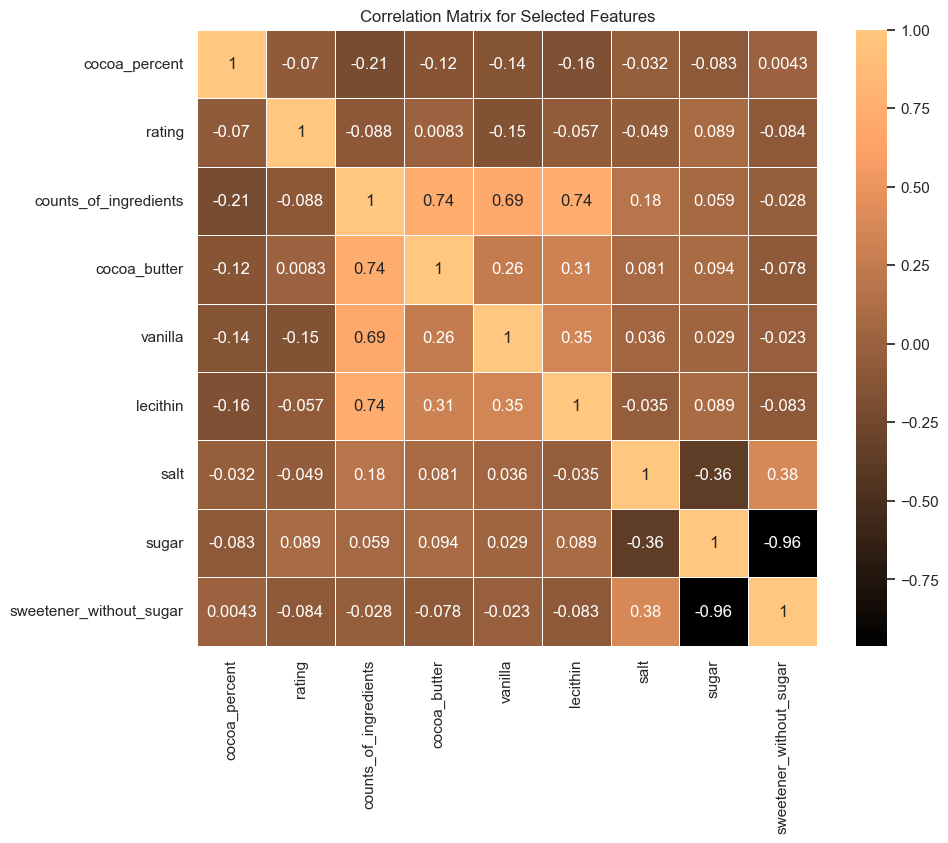

In [2412]:
# Compute the correlation matrix for the selected columns
columns = ['cocoa_percent', 'rating', 'counts_of_ingredients', 'cocoa_butter', 
           'vanilla', 'lecithin', 'salt', 'sugar', 
           'sweetener_without_sugar']

# Filter the dataset to only include the selected columns
s_data = data[columns]

# Compute the correlation matrix
correlation_matrix = s_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='copper', linewidths=0.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()

Strong positive correlations:

Cocoa Butter and Counts of Ingredients: The number of ingredients in the chocolate is strongly associated with the presence of cocoa butter.

Cocoa Butter and Counts of Ingredients have a correlation of 0.74.

Sweetener Without Sugar and Sugar have a strong negative correlation of -0.96. As the amount of sweetener without sugar increases, sugar tends to decrease.

Weak correlations:

Rating has weak negative correlations with Cocoa Percent (-0.07) and Cocoa Butter (-0.15), indicating that cocoa content does not strongly predict rating.

Sugar is negatively correlated with Sweetener Without Sugar at -0.96, which indicates that chocolates with higher amounts of sugar tend to have lower amounts of sweetener without sugar.

### **Step 4: Preprocessing after EDA**

#### **1. Handling class imbalance**

In [2413]:
# Filter out the "Unpleasant" class
data = data[data['Quality'] != 'Unpleasant']

In [2414]:
data['Quality'].value_counts()

Quality
Recommended           735
Highly Recommended    614
Disappointing         462
Outstanding            87
Name: count, dtype: int64

In [2415]:
data.head(10)

company_location country_of_bean_origin  cocoa_percent  rating  \
0            U.S.A             Madagascar           76.0    3.75   
1            U.S.A     Dominican republic           76.0    3.50   
2            U.S.A               Tanzania           76.0    3.25   
3           France                   Peru           63.0    3.75   
4           France                Bolivia           70.0    3.50   
5           France              Venezuela           70.0    4.00   
6           France                   Peru           63.0    4.00   
7           France                Ecuador           70.0    3.75   
8           France                   Peru           70.0    3.50   
9           France                 Brazil           70.0    3.25   

   counts_of_ingredients  beans  cocoa_butter  vanilla  lecithin  salt  sugar  \
0                      3      1             1        0         0     0      1   
1                      3      1             1        0         0     0      1   
2                      3      1             1        0         0     0      1   
3                      4      1             1        0         1     0      1   
4                      4      1             1        0         1     0      1   
5                      4      1             1        0         1     0      1   
6                      3      1             1        0         0     0      1   
7                      4      1             1        0         1     0      1   
8                      4      1             1        0         1     0      1   
9                      4      1             1        0         1     0      1   

   sweetener_without_sugar             Quality  
0                        0  Highly Recommended  
1                        0  Highly Recommended  
2                        0         Recommended  
3                        0  Highly Recommended  
4                        0  Highly Recommended  
5                        0         Outstanding  
6                        0         Outstanding  
7                        0  Highly Recommended  
8                        0  Highly Recommended  
9                        0         Recommended

#### **2. Handling Outliers**

In [2416]:
#Removing outliers using IQR method
print(f"Number of rows: {data.shape[0]}")
outlier_features = ['cocoa_percent','rating']
# Capping at the 5th and 95th percentiles for each feature
for feature in outlier_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows with values outside the bounds
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Check the resulting data after removing outliers
print(f"Number of rows after removing outliers: {data.shape[0]}")


Number of rows: 1898
Number of rows after removing outliers: 1714


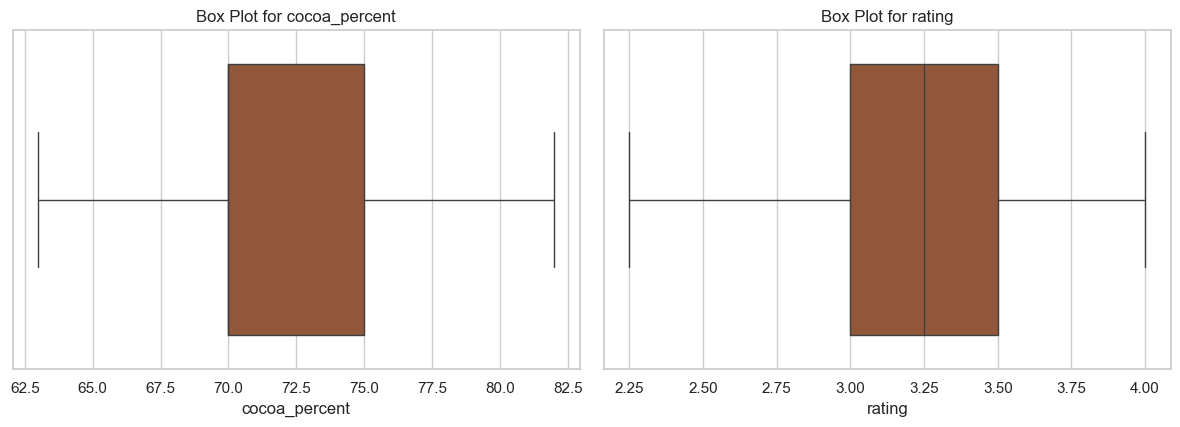

In [2417]:
# Check for outliers in the 'cocoa_percent' and 'rating' columns after removing outliers
outlier_features = ['cocoa_percent', 'rating'] # Specify the features to check for outliers

# Set up the plot for visualizing outliers
plt.figure(figsize=(12, 8))

# Loop over the specified features and create box plots
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=feature, color='sienna')
    plt.title(f'Box Plot for {feature}')
plt.tight_layout()

# Display the plots
plt.show()

Cocoa Percent Box Plot: After handling outliers, the data is now concentrated around 70% cocoa with no extreme values, indicating consistency in the product range.

Rating Box Plot: The removal of outliers has resulted in a more uniform distribution without extreme values, indicating that most chocolates fall within the "Recommended" and "Highly Recommended" rating range.

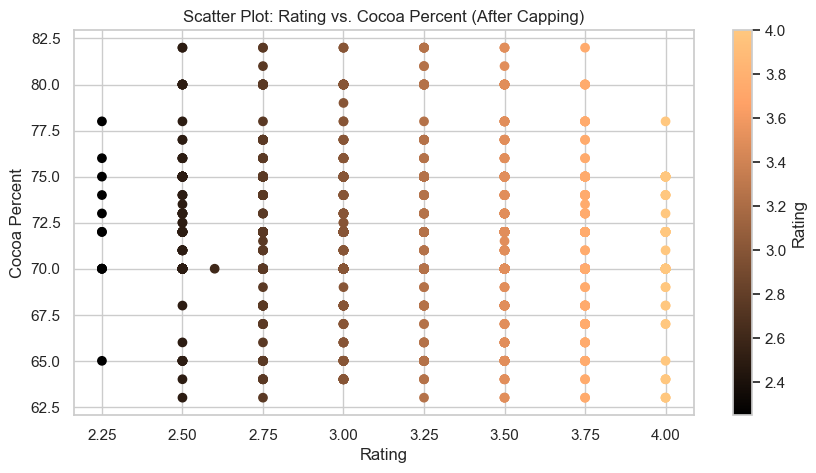

In [2418]:
# Scatter plot for 'rating' vs. 'cocoa_percent' after removing outliers
plt.figure(figsize=(10, 5))
plt.scatter(data['rating'], data['cocoa_percent'],  c=data['rating'], cmap='copper' )

# Add axis labels and title
plt.xlabel('Rating')
plt.ylabel('Cocoa Percent')
plt.title('Scatter Plot: Rating vs. Cocoa Percent (After Capping)')
plt.colorbar(label='Rating')

# Show the plot
plt.show()

The cocoa percentage is confined between 62.5% and 82.5%, with no extreme values present.

Ratings range from 2.5 to 4, with the majority of points concentrated around 3.

The capping process effectively removed extreme cocoa percentages and ensured that all values fall within a defined range, leading to a more consistent relationship between cocoa content and rating



### **Step 5: Feature Engineering**

#### **1. Binning countries into continents**

##### **Binning company location**

In [2419]:
# List of unique company locations
unique_locations = data['company_location'].unique()
print("Unique company locations:", unique_locations)

Unique company locations: ['U.S.A' 'France' 'Fiji' 'Vanuatu' 'Ecuador' 'Mexico' 'Switzerland'
 'Netherlands' 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'Nicaragua' 'U.k.'
 'Australia' 'Philippines' 'Wales' 'Belgium' 'Vietnam' 'Germany'
 'Singapore' 'Venezuela' 'Malaysia' 'Russia' 'South korea' 'Taiwan'
 'Puerto rico' 'Colombia' 'Japan' 'New zealand' 'Costa rica' 'Hungary'
 'Scotland' 'Sao tome' 'St. lucia' 'Guatemala' 'South africa'
 'Dominican republic' 'Sao tome & principe' 'Bolivia' 'Portugal' 'Norway'
 'Denmark' 'Grenada' 'Israel' 'St.vincent-grenadines' 'Czech republic'
 'Thailand' 'Finland' 'Madagascar' 'Sweden' 'Poland' 'Austria' 'Honduras'
 'U.a.e.' 'Lithuania' 'Ireland' 'Chile' 'Ghana' 'Iceland' 'Argentina'
 'India' 'Suriname' 'El salvador']


In [2420]:
# Define lists for each continent
asia = ['Japan', 'Vietnam', 'Israel', 'South Korea', 'Singapore', 'India', 'Philippines', 'Russia','U.a.e.',
        'Malaysia','South korea','Taiwan','Thailand', 'U.A.E.', 'Burma', 'Indonesia','Sri lanka', 'Sumatra','Sulawesi']
africa = ['Madagascar', 'Sao tome', 'South africa', 'Ghana','Sao tome & principe','Madagascar', 'Tanzania','Togo','Congo',
        'Uganda','Ivory coast','Gabon','Liberia','Sierra leone', 'Nigeria','Cameroon','Sao tome & principe',
        'Principe', 'Dr congo','Cameroon']
north_america = ['U.S.A', 'Grenada','Canada', 'Martinique', 'Nicaragua', 'Guatemala', 'St. lucia','Mexico', 
                 'Costa rica', 'Honduras', 'Dominican republic','Puerto rico','St.vincent-grenadines',
                 'El salvador', 'U.s.a.', 'Panama','Cuba', 'Belize','Jamaica','Haiti']
south_america = ['Eucador', 'Colombia', 'Suriname', 'Bolivia', 'Venezuela', 'Chile', 'Peru', 'Brazil', 
                 'Argentina', 'Ecuador', 'Ecuador','Trinidad','Tobago']
europe = ['France', 'Denmark', 'Scotland', 'Wales', 'Czech republic', 'Finland', 'Ireland', 'Portugal', 'Netherlands', 
          'Poland', 'Sweden', 'U.k.', 'Italy', 'Belgium', 'Switzerland', 'Germany', 'Austria', 'Spain', 'Hungary','Norway',
          'Lithuania','Iceland']
australia = ['Australia', 'New zealand', 'Fiji','Vanuatu', 'New Zealand', 'Vanuatu','Solomon islands','Samoa','Papua new guinea']

In [2421]:
# Function to map each company location to a continent
def map_to_continent(location):
    if location in asia:
        return 'Asia'
    elif location in africa:
        return 'Africa'
    elif location in north_america:
        return 'North America'
    elif location in south_america:
        return 'South America'
    elif location in europe:
        return 'Europe'
    elif location in australia:
        return 'Australia'
    else:
        return 'Unknown'

In [2422]:
# Apply the 'map_to_continent' function to the 'company_location' column
# Create a new column 'company_continent' to store the continent of each company
data['company_continent']=data['company_location'].apply(map_to_continent)

In [2423]:
data.head()

company_location country_of_bean_origin  cocoa_percent  rating  \
0            U.S.A             Madagascar           76.0    3.75   
1            U.S.A     Dominican republic           76.0    3.50   
2            U.S.A               Tanzania           76.0    3.25   
3           France                   Peru           63.0    3.75   
4           France                Bolivia           70.0    3.50   

   counts_of_ingredients  beans  cocoa_butter  vanilla  lecithin  salt  sugar  \
0                      3      1             1        0         0     0      1   
1                      3      1             1        0         0     0      1   
2                      3      1             1        0         0     0      1   
3                      4      1             1        0         1     0      1   
4                      4      1             1        0         1     0      1   

   sweetener_without_sugar             Quality company_continent  
0                        0  Highly Recommended     North America  
1                        0  Highly Recommended     North America  
2                        0         Recommended     North America  
3                        0  Highly Recommended            Europe  
4                        0  Highly Recommended            Europe

In [2424]:
# Print the value counts of the 'company_continent' column
print(data['company_continent'].value_counts())

company_continent
North America    847
Europe           574
South America    105
Asia              89
Australia         74
Africa            25
Name: count, dtype: int64


In [2425]:
# Drop the 'company_location' column from the dataset
data.drop(['company_location'], axis=1, inplace=True)

In [2426]:
data.head()

country_of_bean_origin  cocoa_percent  rating  counts_of_ingredients  beans  \
0             Madagascar           76.0    3.75                      3      1   
1     Dominican republic           76.0    3.50                      3      1   
2               Tanzania           76.0    3.25                      3      1   
3                   Peru           63.0    3.75                      4      1   
4                Bolivia           70.0    3.50                      4      1   

   cocoa_butter  vanilla  lecithin  salt  sugar  sweetener_without_sugar  \
0             1        0         0     0      1                        0   
1             1        0         0     0      1                        0   
2             1        0         0     0      1                        0   
3             1        0         1     0      1                        0   
4             1        0         1     0      1                        0   

              Quality company_continent  
0  Highly Recommended     North America  
1  Highly Recommended     North America  
2         Recommended     North America  
3  Highly Recommended            Europe  
4  Highly Recommended            Europe

##### **Binning bean location**

In [2427]:
# List of unique company locations
unique_location_bean = data['country_of_bean_origin'].unique()
unique_location_bean

array(['Madagascar', 'Dominican republic', 'Tanzania', 'Peru', 'Bolivia',
       'Venezuela', 'Ecuador', 'Brazil', 'Papua new guinea', 'Burma',
       'Panama', 'Colombia', 'Cuba', 'Togo', 'Sao tome', 'Mexico', 'Fiji',
       'Vanuatu', 'Indonesia', 'Trinidad', 'Vietnam', 'Nicaragua',
       'Ghana', 'Belize', 'Blend', 'Grenada', 'Jamaica', 'Guatemala',
       'Costa rica', 'Honduras', 'Haiti', 'India', 'Congo', 'Philippines',
       'Solomon islands', 'Uganda', 'Malaysia', 'Sri lanka',
       'Ivory coast', 'Gabon', 'Taiwan', 'Puerto rico', 'St. lucia',
       'Australia', 'Liberia', 'Sierra leone', 'Nigeria', 'U.s.a.',
       'St.vincent-grenadines', 'Thailand', 'Bolvia', 'Sumatra',
       'El salvador', 'Cameroon', 'Samoa', 'Sao tome & principe',
       'Principe', 'Sulawesi', 'Suriname', 'Dr congo'], dtype=object)

In [2428]:
# Apply the 'map_to_continent' function to the 'country_of_bean_origin' column
# Create a new column 'bean_continent' to store the continent of the bean origin
data['bean_continent']=data['country_of_bean_origin'].apply(map_to_continent)

In [2429]:
# Filter the rows where the 'bean_continent' is 'Unknown'
unknown_location_bean = data[data['bean_continent'].str.strip() == 'Unknown']

# Display the 'country_of_bean_origin' and 'bean_continent' columns for these rows
unknown_location_bean[['country_of_bean_origin', 'bean_continent']]

country_of_bean_origin bean_continent
88                    Blend        Unknown
92                    Blend        Unknown
96                    Blend        Unknown
100                   Blend        Unknown
177                   Blend        Unknown
...                     ...            ...
2129                  Blend        Unknown
2198                  Blend        Unknown
2211                  Blend        Unknown
2219                  Blend        Unknown
2223                  Blend        Unknown

[86 rows x 2 columns]

In [2430]:
# Count the occurrences of each unique value in the 'bean_continent' column
data['bean_continent'].value_counts()

bean_continent
South America    662
North America    489
Africa           270
Asia             127
Unknown           86
Australia         80
Name: count, dtype: int64

In [2431]:
data.head(10)

country_of_bean_origin  cocoa_percent  rating  counts_of_ingredients  beans  \
0             Madagascar           76.0    3.75                      3      1   
1     Dominican republic           76.0    3.50                      3      1   
2               Tanzania           76.0    3.25                      3      1   
3                   Peru           63.0    3.75                      4      1   
4                Bolivia           70.0    3.50                      4      1   
5              Venezuela           70.0    4.00                      4      1   
6                   Peru           63.0    4.00                      3      1   
7                Ecuador           70.0    3.75                      4      1   
8                   Peru           70.0    3.50                      4      1   
9                 Brazil           70.0    3.25                      4      1   

   cocoa_butter  vanilla  lecithin  salt  sugar  sweetener_without_sugar  \
0             1        0         0     0      1                        0   
1             1        0         0     0      1                        0   
2             1        0         0     0      1                        0   
3             1        0         1     0      1                        0   
4             1        0         1     0      1                        0   
5             1        0         1     0      1                        0   
6             1        0         0     0      1                        0   
7             1        0         1     0      1                        0   
8             1        0         1     0      1                        0   
9             1        0         1     0      1                        0   

              Quality company_continent bean_continent  
0  Highly Recommended     North America         Africa  
1  Highly Recommended     North America  North America  
2         Recommended     North America         Africa  
3  Highly Recommended            Europe  South America  
4  Highly Recommended            Europe  South America  
5         Outstanding            Europe  South America  
6         Outstanding            Europe  South America  
7  Highly Recommended            Europe  South America  
8  Highly Recommended            Europe  South America  
9         Recommended            Europe  South America

In [2432]:
data.drop(['country_of_bean_origin'], axis=1, inplace=True)

In [2433]:
data.head()

cocoa_percent  rating  counts_of_ingredients  beans  cocoa_butter  vanilla  \
0           76.0    3.75                      3      1             1        0   
1           76.0    3.50                      3      1             1        0   
2           76.0    3.25                      3      1             1        0   
3           63.0    3.75                      4      1             1        0   
4           70.0    3.50                      4      1             1        0   

   lecithin  salt  sugar  sweetener_without_sugar             Quality  \
0         0     0      1                        0  Highly Recommended   
1         0     0      1                        0  Highly Recommended   
2         0     0      1                        0         Recommended   
3         1     0      1                        0  Highly Recommended   
4         1     0      1                        0  Highly Recommended   

  company_continent bean_continent  
0     North America         Africa  
1     North America  North America  
2     North America         Africa  
3            Europe  South America  
4            Europe  South America

#### **2. Encoding for categorical continent features**

In [2434]:
# Perform one-hot encoding for the first_taste_category column
one_hot_encoded_bean = pd.get_dummies(data['bean_continent'], prefix='bean_continent')

# Perform one-hot encoding for the second_taste_category column
one_hot_encoded_company = pd.get_dummies(data['company_continent'], prefix='company_continent')

# Combine the original DataFrame with the one-hot encoded DataFrames
df_encoded_location = pd.concat([one_hot_encoded_bean, one_hot_encoded_company], axis=1)

# Convert the one-hot encoded columns to integers (1 and 0)
df_encoded_location[one_hot_encoded_bean.columns] = df_encoded_location[one_hot_encoded_bean.columns].astype(int)
df_encoded_location[one_hot_encoded_company.columns] = df_encoded_location[one_hot_encoded_company.columns].astype(int)

# Display the results of the one-hot encoding
df_encoded_location.head()  # Display the first few rows of the updated DataFrame


bean_continent_Africa  bean_continent_Asia  bean_continent_Australia  \
0                      1                    0                         0   
1                      0                    0                         0   
2                      1                    0                         0   
3                      0                    0                         0   
4                      0                    0                         0   

   bean_continent_North America  bean_continent_South America  \
0                             0                             0   
1                             1                             0   
2                             0                             0   
3                             0                             1   
4                             0                             1   

   bean_continent_Unknown  company_continent_Africa  company_continent_Asia  \
0                       0                         0                       0   
1                       0                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   

   company_continent_Australia  company_continent_Europe  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         1   
4                            0                         1   

   company_continent_North America  company_continent_South America  
0                                1                                0  
1                                1                                0  
2                                1                                0  
3                                0                                0  
4                                0                                0

In [2435]:
# Display the column names of 'df_encoded_location'
df_encoded_location.columns

Index(['bean_continent_Africa', 'bean_continent_Asia',
       'bean_continent_Australia', 'bean_continent_North America',
       'bean_continent_South America', 'bean_continent_Unknown',
       'company_continent_Africa', 'company_continent_Asia',
       'company_continent_Australia', 'company_continent_Europe',
       'company_continent_North America', 'company_continent_South America'],
      dtype='object')

In [2436]:
# Concatenate the original data with the encoded location data along the columns
data_encoded = pd.concat([data, df_encoded_location], axis=1)


# Display the first few rows of the resulting data_encoded
data_encoded.head()

cocoa_percent  rating  counts_of_ingredients  beans  cocoa_butter  vanilla  \
0           76.0    3.75                      3      1             1        0   
1           76.0    3.50                      3      1             1        0   
2           76.0    3.25                      3      1             1        0   
3           63.0    3.75                      4      1             1        0   
4           70.0    3.50                      4      1             1        0   

   lecithin  salt  sugar  sweetener_without_sugar  ...  \
0         0     0      1                        0  ...   
1         0     0      1                        0  ...   
2         0     0      1                        0  ...   
3         1     0      1                        0  ...   
4         1     0      1                        0  ...   

  bean_continent_Australia bean_continent_North America  \
0                        0                            0   
1                        0                            1   
2                        0                            0   
3                        0                            0   
4                        0                            0   

  bean_continent_South America  bean_continent_Unknown  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            1                       0   
4                            1                       0   

   company_continent_Africa  company_continent_Asia  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   company_continent_Australia  company_continent_Europe  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         1   
4                            0                         1   

   company_continent_North America  company_continent_South America  
0                                1                                0  
1                                1                                0  
2                                1                                0  
3                                0                                0  
4                                0                                0  

[5 rows x 25 columns]

In [2437]:
# Display the column names of the data_encoded DataFrame
data_encoded.columns 

# Remove the 'company_continent' and 'bean_continent' columns from the DataFrame
data_encoded.drop(['company_continent', 'bean_continent'], axis=1, inplace=True)

In [2438]:
# Display the column names of the data_encoded DataFrame
data_encoded.columns

Index(['cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'Quality', 'bean_continent_Africa',
       'bean_continent_Asia', 'bean_continent_Australia',
       'bean_continent_North America', 'bean_continent_South America',
       'bean_continent_Unknown', 'company_continent_Africa',
       'company_continent_Asia', 'company_continent_Australia',
       'company_continent_Europe', 'company_continent_North America',
       'company_continent_South America'],
      dtype='object')

### **Step 6: Cluster Algorithms**

In [2439]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [2440]:
# Remove the 'Quality' column from the data_encoded DataFrame for clustering
cluster_data = data_encoded.drop(['Quality'], axis=1)

#### **Checking the variance** 

Low-variance features contribute minimally to clustering and PCA since they don't differentiate data points effectively.

In [2441]:
# Calculate and print the variance for selected columns in the cluster_data DataFrame
print(cluster_data[['cocoa_percent', 'rating', 'counts_of_ingredients','beans', 'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']].var())

cocoa_percent              13.506808
rating                      0.167982
counts_of_ingredients       0.839008
beans                       0.000000
cocoa_butter                0.211005
vanilla                     0.128350
lecithin                    0.171674
salt                        0.017207
sugar                       0.037045
sweetener_without_sugar     0.037045
dtype: float64


In [2442]:
#EXPERTIMENT 0: Without removing any features

# EXPERIMENT 1:
# dropping the columns with low variance
cluster_data_wo_rating = cluster_data.drop([ 'rating', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar' ], axis=1)

# EXPERIMENT 2:
# dropping the columns with low variance but keeping the rating column since rating has 
# high negative correlation with features such as cocoa_percent and counts_of_ingredients 
cluster_data_w_rating = cluster_data.drop(['beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar' ], axis=1)

After Experimenting both, the PCA results given below show that Clustering with rating appears better since it is more defined and compact clusters.

#### 1. **Standardizing Data**

In [2443]:
scaler = StandardScaler()

# EXP0: Standardize the data for clustering 
scaled_cluster_data = scaler.fit_transform(cluster_data)
cluster_data = pd.DataFrame(scaled_cluster_data, columns=cluster_data.columns, index=data.index) 

# EXP1: Standardize the data for clustering without the rating column
scaled_cluster_data = scaler.fit_transform(cluster_data_wo_rating)
cluster_data_wo_rating = pd.DataFrame(scaled_cluster_data, columns=cluster_data_wo_rating.columns, index=data.index) 

# EXP2: Standardize the data for clustering with the rating column
scaled_cluster_data = scaler.fit_transform(cluster_data_w_rating)
cluster_data_w_rating = pd.DataFrame(scaled_cluster_data, columns=cluster_data_w_rating.columns, index=data.index)

In [2444]:
# Display the first 5 rows of the standardized 'cluster_data' 
cluster_data.head()

cocoa_percent    rating  counts_of_ingredients  beans  cocoa_butter  \
0       1.193034  1.292062              -0.094296    0.0      0.658111   
1       1.193034  0.681914              -0.094296    0.0      0.658111   
2       1.193034  0.071765              -0.094296    0.0      0.658111   
3      -2.345258  1.292062               0.997757    0.0      0.658111   
4      -0.440024  0.681914               0.997757    0.0      0.658111   

    vanilla  lecithin      salt     sugar  sweetener_without_sugar  ...  \
0 -0.421909 -0.531013 -0.133472  0.200121                -0.200121  ...   
1 -0.421909 -0.531013 -0.133472  0.200121                -0.200121  ...   
2 -0.421909 -0.531013 -0.133472  0.200121                -0.200121  ...   
3 -0.421909  1.883194 -0.133472  0.200121                -0.200121  ...   
4 -0.421909  1.883194 -0.133472  0.200121                -0.200121  ...   

   bean_continent_Australia  bean_continent_North America  \
0                 -0.221268                     -0.631810   
1                 -0.221268                      1.582755   
2                 -0.221268                     -0.631810   
3                 -0.221268                     -0.631810   
4                 -0.221268                     -0.631810   

   bean_continent_South America  bean_continent_Unknown  \
0                     -0.793270               -0.229838   
1                     -0.793270               -0.229838   
2                     -0.793270               -0.229838   
3                      1.260605               -0.229838   
4                      1.260605               -0.229838   

   company_continent_Africa  company_continent_Asia  \
0                 -0.121662               -0.234028   
1                 -0.121662               -0.234028   
2                 -0.121662               -0.234028   
3                 -0.121662               -0.234028   
4                 -0.121662               -0.234028   

   company_continent_Australia  company_continent_Europe  \
0                    -0.212419                 -0.709584   
1                    -0.212419                 -0.709584   
2                    -0.212419                 -0.709584   
3                    -0.212419                  1.409277   
4                    -0.212419                  1.409277   

   company_continent_North America  company_continent_South America  
0                         1.011737                        -0.255456  
1                         1.011737                        -0.255456  
2                         1.011737                        -0.255456  
3                        -0.988399                        -0.255456  
4                        -0.988399                        -0.255456  

[5 rows x 22 columns]

In [2445]:
# Display the first 5 rows of the standardized 'cluster_data_wo_rating' 
cluster_data_wo_rating.head()

cocoa_percent  counts_of_ingredients  bean_continent_Africa  \
0       1.193034              -0.094296               2.312606   
1       1.193034              -0.094296              -0.432413   
2       1.193034              -0.094296               2.312606   
3      -2.345258               0.997757              -0.432413   
4      -0.440024               0.997757              -0.432413   

   bean_continent_Asia  bean_continent_Australia  \
0            -0.282887                 -0.221268   
1            -0.282887                 -0.221268   
2            -0.282887                 -0.221268   
3            -0.282887                 -0.221268   
4            -0.282887                 -0.221268   

   bean_continent_North America  bean_continent_South America  \
0                     -0.631810                     -0.793270   
1                      1.582755                     -0.793270   
2                     -0.631810                     -0.793270   
3                     -0.631810                      1.260605   
4                     -0.631810                      1.260605   

   bean_continent_Unknown  company_continent_Africa  company_continent_Asia  \
0               -0.229838                 -0.121662               -0.234028   
1               -0.229838                 -0.121662               -0.234028   
2               -0.229838                 -0.121662               -0.234028   
3               -0.229838                 -0.121662               -0.234028   
4               -0.229838                 -0.121662               -0.234028   

   company_continent_Australia  company_continent_Europe  \
0                    -0.212419                 -0.709584   
1                    -0.212419                 -0.709584   
2                    -0.212419                 -0.709584   
3                    -0.212419                  1.409277   
4                    -0.212419                  1.409277   

   company_continent_North America  company_continent_South America  
0                         1.011737                        -0.255456  
1                         1.011737                        -0.255456  
2                         1.011737                        -0.255456  
3                        -0.988399                        -0.255456  
4                        -0.988399                        -0.255456

In [2446]:
# Display the first 5 rows of the standardized 'cluster_data_w_rating'
cluster_data_w_rating.head()

cocoa_percent    rating  counts_of_ingredients  bean_continent_Africa  \
0       1.193034  1.292062              -0.094296               2.312606   
1       1.193034  0.681914              -0.094296              -0.432413   
2       1.193034  0.071765              -0.094296               2.312606   
3      -2.345258  1.292062               0.997757              -0.432413   
4      -0.440024  0.681914               0.997757              -0.432413   

   bean_continent_Asia  bean_continent_Australia  \
0            -0.282887                 -0.221268   
1            -0.282887                 -0.221268   
2            -0.282887                 -0.221268   
3            -0.282887                 -0.221268   
4            -0.282887                 -0.221268   

   bean_continent_North America  bean_continent_South America  \
0                     -0.631810                     -0.793270   
1                      1.582755                     -0.793270   
2                     -0.631810                     -0.793270   
3                     -0.631810                      1.260605   
4                     -0.631810                      1.260605   

   bean_continent_Unknown  company_continent_Africa  company_continent_Asia  \
0               -0.229838                 -0.121662               -0.234028   
1               -0.229838                 -0.121662               -0.234028   
2               -0.229838                 -0.121662               -0.234028   
3               -0.229838                 -0.121662               -0.234028   
4               -0.229838                 -0.121662               -0.234028   

   company_continent_Australia  company_continent_Europe  \
0                    -0.212419                 -0.709584   
1                    -0.212419                 -0.709584   
2                    -0.212419                 -0.709584   
3                    -0.212419                  1.409277   
4                    -0.212419                  1.409277   

   company_continent_North America  company_continent_South America  
0                         1.011737                        -0.255456  
1                         1.011737                        -0.255456  
2                         1.011737                        -0.255456  
3                        -0.988399                        -0.255456  
4                        -0.988399                        -0.255456

#### **PCA - Principle Component Analysis**

##### **0. PCA conducted with all the features**

In [2447]:
# Perform PCA to reduce the data to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_data)

# Convert the PCA result to a DataFrame for better readability
pca_df= pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Display the first 5 rows of the PCA DataFrame
print(pca_df.head())

        PC1       PC2
0 -0.723192  0.371091
1 -1.037837  0.430388
2 -0.735442  0.237768
3  2.613088  0.417854
4  2.367007  0.399696


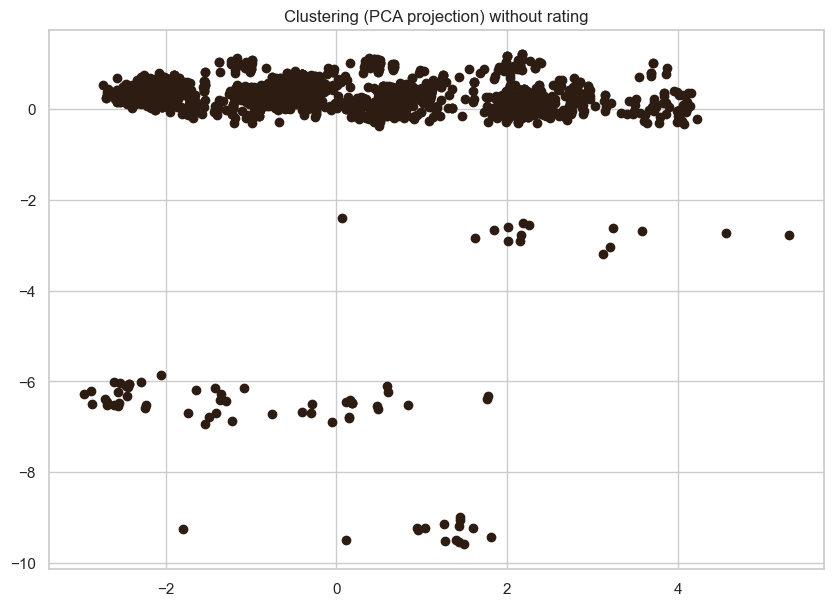

In [2448]:
# Visualize data BEFORE clustering (PCA projection without clusters)
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('Clustering (PCA projection) without rating')
plt.show()

##### **1. PCA conducted without rating**

In [2449]:
# Perform PCA to reduce the data (without the 'rating' column) to 2 components
pca = PCA(n_components=2)
pca_data_wo_rating = pca.fit_transform(cluster_data_wo_rating)

# Convert the PCA result to a DataFrame for better readability
pca_df_wo_rating = pd.DataFrame(pca_data_wo_rating, columns=['PC1', 'PC2'])

# Display the first 5 rows of the PCA DataFrame
print(pca_df_wo_rating.head())

        PC1       PC2
0  1.220653 -0.462193
1  2.105583  0.025269
2  1.220653 -0.462193
3 -2.337854  0.096732
4 -2.109694  0.264767


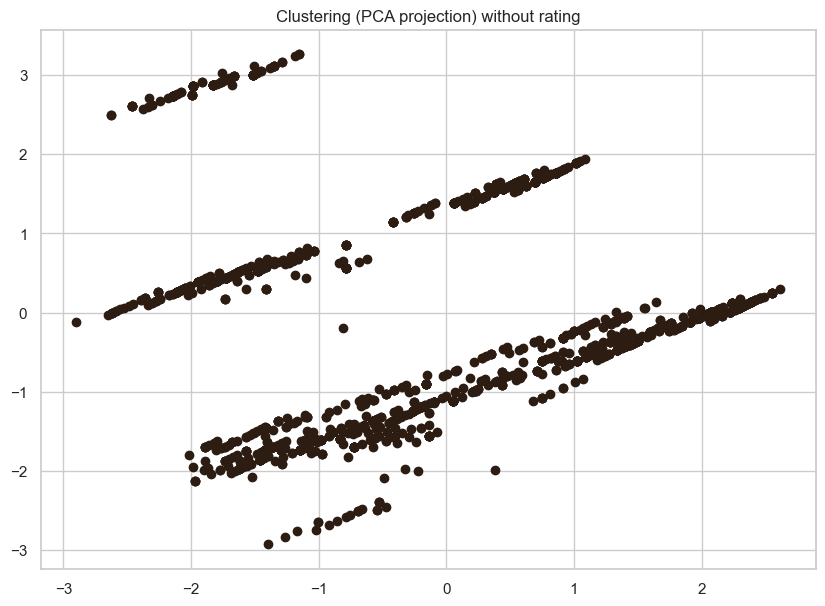

In [2450]:
# Visualize data BEFORE clustering (PCA projection without clusters)
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_wo_rating[:, 0], pca_data_wo_rating[:, 1])
plt.title('Clustering (PCA projection) without rating')
plt.show()

##### **2. PCA conducted with rating**

In [2451]:
# Perform PCA to reduce the data (with the 'rating' column) to 2 components
pca = PCA(n_components=2)
pca_data_w_rating = pca.fit_transform(cluster_data_w_rating)

# Convert the PCA result to a DataFrame for better readability
pca_df_w_rating = pd.DataFrame(pca_data_w_rating, columns=['PC1', 'PC2'])

# Display the first 5 rows of the PCA DataFrame
print(pca_df_w_rating.head())

        PC1       PC2
0  1.127347 -0.457702
1  2.054136  0.028647
2  1.223278 -0.461838
3 -2.448984  0.100198
4 -2.159361  0.265337


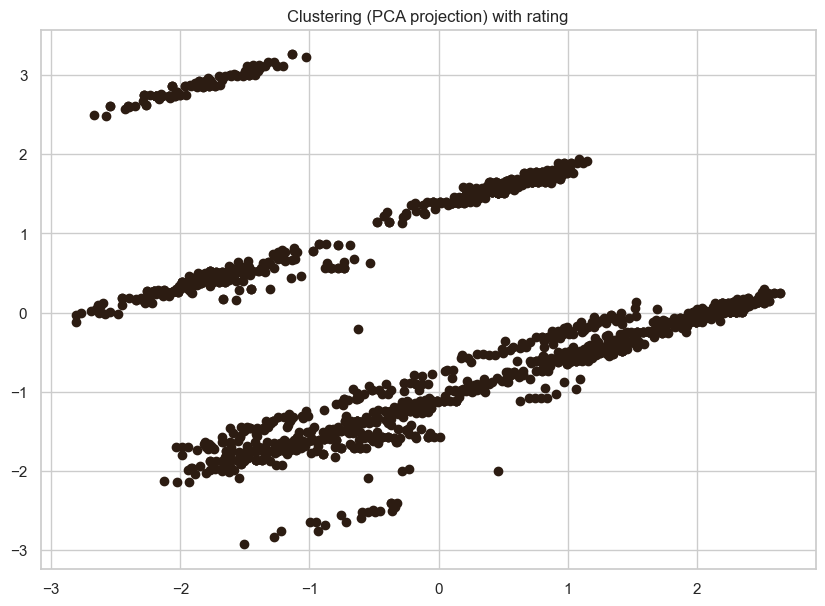

In [2452]:
# Visualize the PCA projection with the 'rating' included
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_w_rating[:, 0], pca_data_w_rating[:, 1])
plt.title('Clustering (PCA projection) with rating')
plt.show()

PCA Insight:
- Since the PCA plot with ratings shows more structure we will use that to cluster.
- Applying a clustering algorithm like Gaussian Mixture Model (GMM), K-Means, or Hierarchical Clustering would help identify and formalize these potential clusters.

#### **Clustering**

##### **1. K-means clustering**

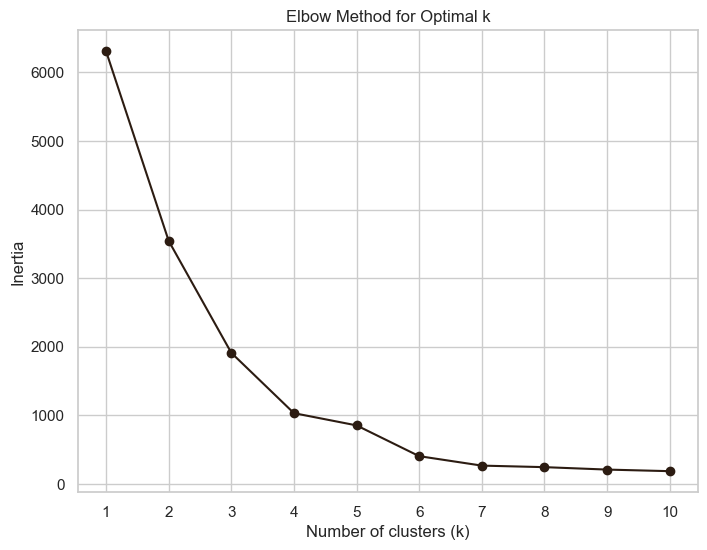

In [2453]:
# Use PCA data for KMeans clustering
kmean_data = pca_data_w_rating

# Define range of k values to try
k_values = range(1, 11)
inertias = []

# Calculate inertia for each k value (sum of squared distances to the nearest cluster center)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmean_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [2454]:
# Define range of k values to evaluate
k_values = [2,3,4,5]
inertia_values = []
silhouette_scores = {}

# Loop through each k value
for k in k_values:
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmean_data)

    # Append inertia (sum of squared distances) for each k
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score for each k
    score = silhouette_score(kmean_data, kmeans.labels_)
    silhouette_scores[k] = score
    
    # Print results for each k
    print(f"K = {k}")
    print(f"Inertia: {kmeans.inertia_}")
    print(f"Silhouette Score: {score}")
    print("-" * 30)


K = 2
Inertia: 3542.990083677892
Silhouette Score: 0.4528257002287164
------------------------------
K = 3
Inertia: 1910.3468049831242
Silhouette Score: 0.5302614610734373
------------------------------
K = 4
Inertia: 1030.4643001230015
Silhouette Score: 0.6264730625183129
------------------------------
K = 5
Inertia: 852.1574130007621
Silhouette Score: 0.5752692423824226
------------------------------


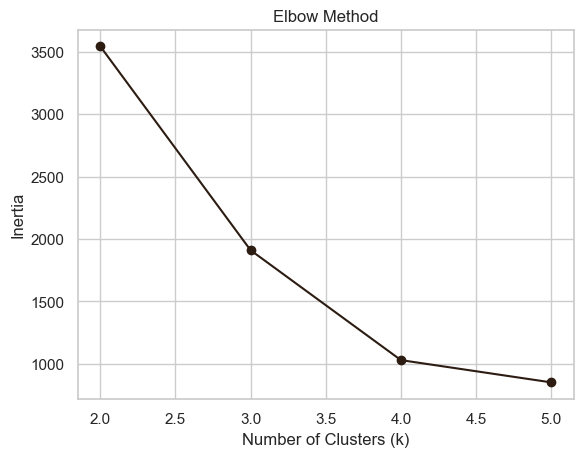

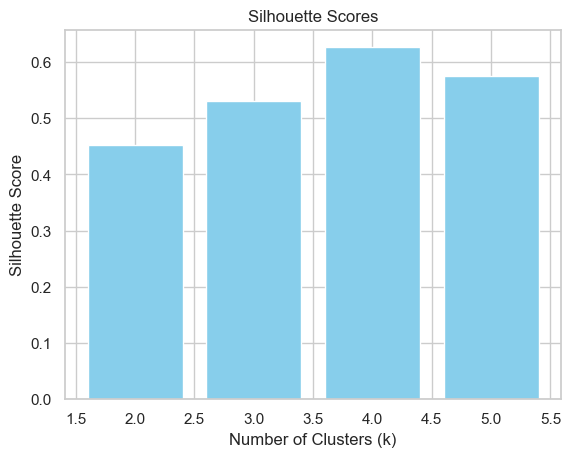

In [2455]:
# Plot inertia values for different k values
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Visualize silhouette scores
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

##### **2. Hierarchical Clustering**

For n_clusters = 2, The average silhouette_score is: 0.44
For n_clusters = 3, The average silhouette_score is: 0.53
For n_clusters = 4, The average silhouette_score is: 0.62
For n_clusters = 5, The average silhouette_score is: 0.68


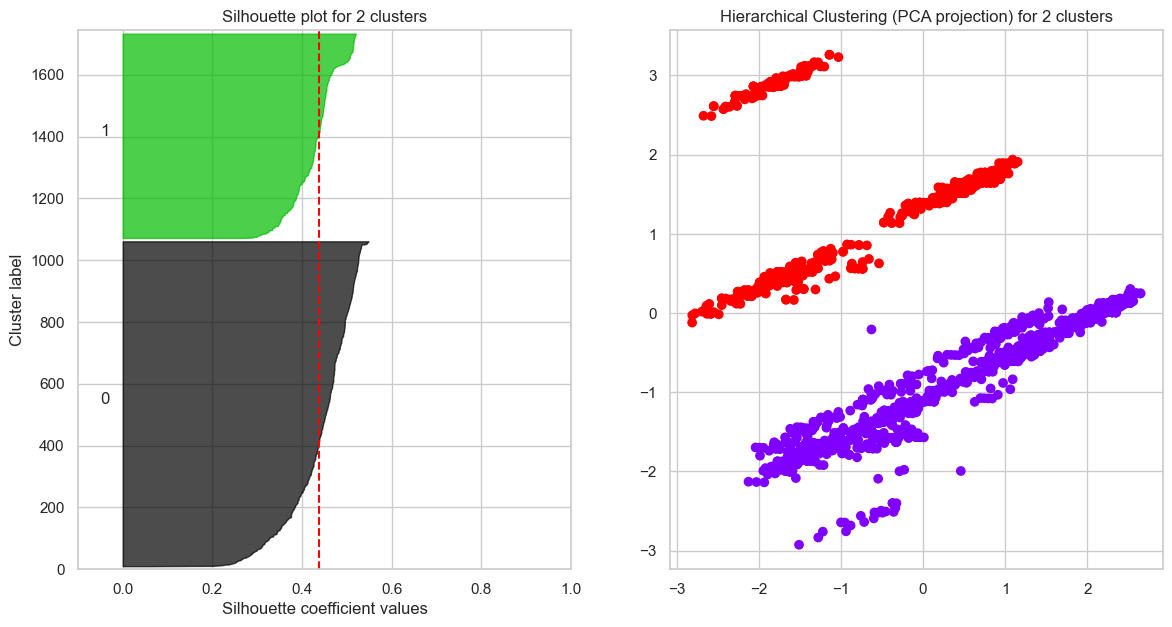

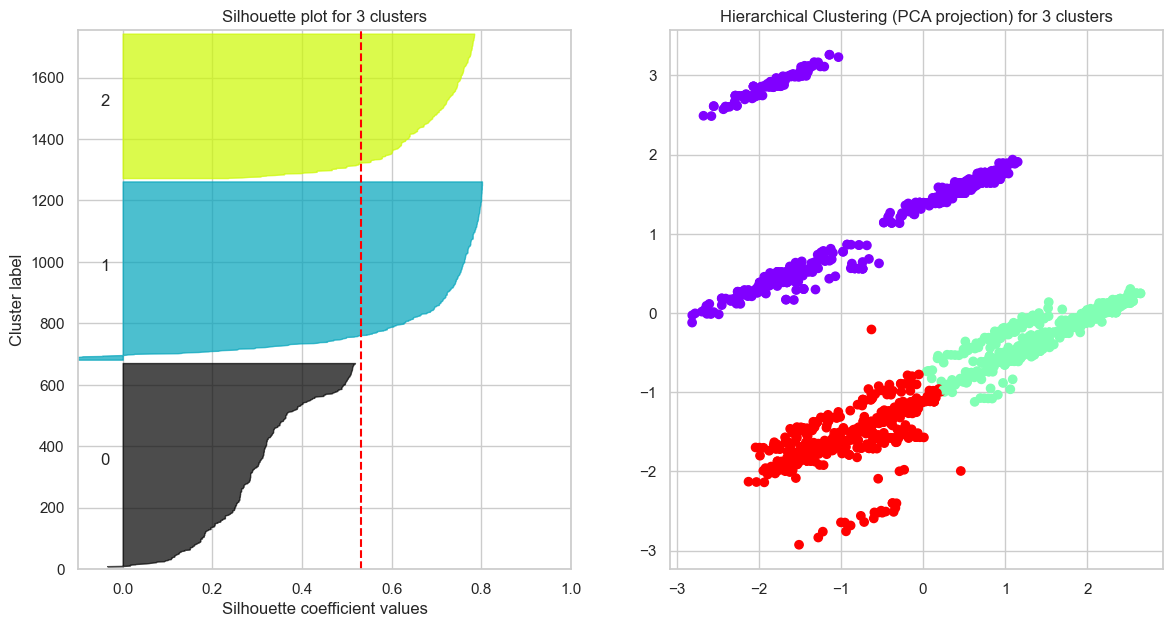

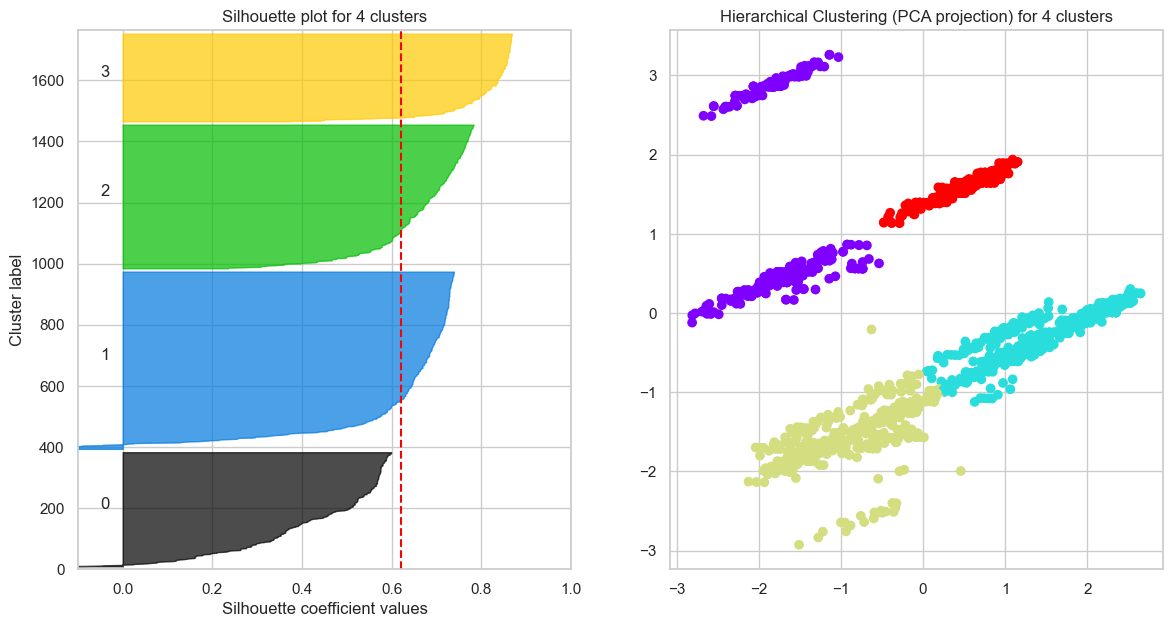

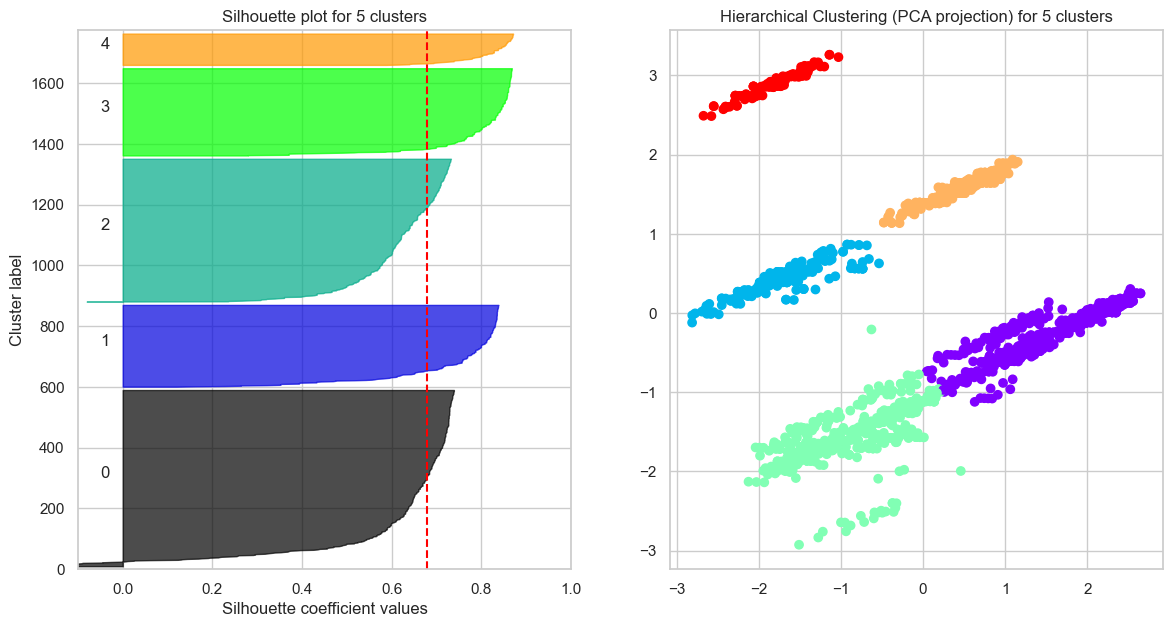

In [2456]:
# Perform Hierarchical Clustering

# Range of cluster numbers to test
range_n_clusters = [2, 3, 4, 5]

# To store results for each number of clusters
clustering_results = []

# Use PCA-reduced data for clustering
hierarchical_data = pca_data_w_rating

# Train clustering and calculate silhouette scores, storing the results
for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') # Hierarchical clustering with Ward linkage
    cluster_labels = clustering.fit_predict(hierarchical_data) # Fit model and predict cluster labels

    # Calculate silhouette score for the clustering
    silhouette_avg = silhouette_score(hierarchical_data, cluster_labels)
    clustering_results.append((n_clusters, cluster_labels, silhouette_avg))

# Print silhouette scores for each number of clusters
for n_clusters, _, silhouette_avg in clustering_results:
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg:.2f}")

# Plot silhouette plots and PCA projections for each clustering
for n_clusters, cluster_labels, silhouette_avg in clustering_results:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)

    # Silhouette plot
    sample_silhouette_values = silhouette_samples(hierarchical_data, cluster_labels)
    y_lower = 10
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(hierarchical_data) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] # Silhouette values for cluster i
        ith_cluster_silhouette_values.sort() # Sort values for better visualization
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill silhouette plot for each cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # Show average silhouette score

    # PCA projection with clusters
    ax2.scatter(hierarchical_data[:, 0], hierarchical_data[:, 1], c=cluster_labels, cmap='rainbow')
    ax2.set_title(f"Hierarchical Clustering (PCA projection) for {n_clusters} clusters")

    # Display plots
    plt.show()


##### **3. Gaussian Mixture Model Clustering (GMM)**

In [2457]:
# Define the range of cluster numbers to evaluate
range_n_clusters = [2, 3, 4, 5]
gmm_results = [] # Store results for each cluster configuration
gmm_data = pca_data_w_rating # Use PCA-reduced data for Gaussian Mixture Model (GMM)

# Train GMM, calculate BIC/AIC, silhouette score, and store results
for n_clusters in range_n_clusters:

    # Initialize GMM with the current number of clusters
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(gmm_data) # Fit the model to the data

    # Predict cluster labels
    labels = gmm.predict(gmm_data)

    # Calculate BIC and AIC
    bic = gmm.bic(gmm_data)
    aic = gmm.aic(gmm_data)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(gmm_data, labels)

    # Store clustering results
    gmm_results.append((n_clusters, labels, silhouette_avg, bic, aic, gmm.lower_bound_, gmm.n_iter_))

# Print silhouette scores for each number of clusters
for n_clusters, _, silhouette_avg, _, _, _, _ in gmm_results:
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg:.2f}")

For n_clusters = 2, The average silhouette_score is: 0.45
For n_clusters = 3, The average silhouette_score is: 0.39
For n_clusters = 4, The average silhouette_score is: 0.57
For n_clusters = 5, The average silhouette_score is: 0.68


Number of Clusters | BIC Value | AIC Value
------------------------------------------
2                  | 10994.58  | 10934.66 
3                  | 7094.23   | 7001.63  
4                  | 6011.30   | 5886.03  
5                  | 5255.49   | 5097.54  


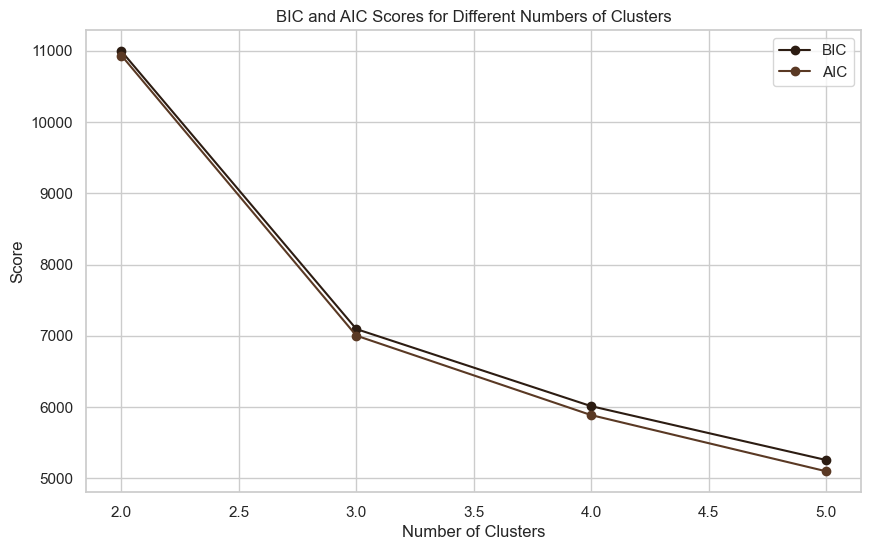

In [2458]:
#BIC and AIC result
# Extract the number of clusters, BIC, and AIC from gmm_results
bic_values = [result[3] for result in gmm_results]
aic_values = [result[4] for result in gmm_results]

print("Number of Clusters | BIC Value | AIC Value")
print("------------------------------------------")
for n_clusters, bic, aic in zip(range_n_clusters, bic_values, aic_values):
    print(f"{n_clusters:<18} | {bic:<9.2f} | {aic:<9.2f}")

# Plot BIC and AIC values
plt.figure(figsize=(10, 6))

# Plot BIC
plt.plot(range_n_clusters, bic_values, label='BIC', marker='o')
# Plot AIC
plt.plot(range_n_clusters, aic_values, label='AIC', marker='o')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC Scores for Different Numbers of Clusters')
plt.legend()

# Show the plot
plt.show()


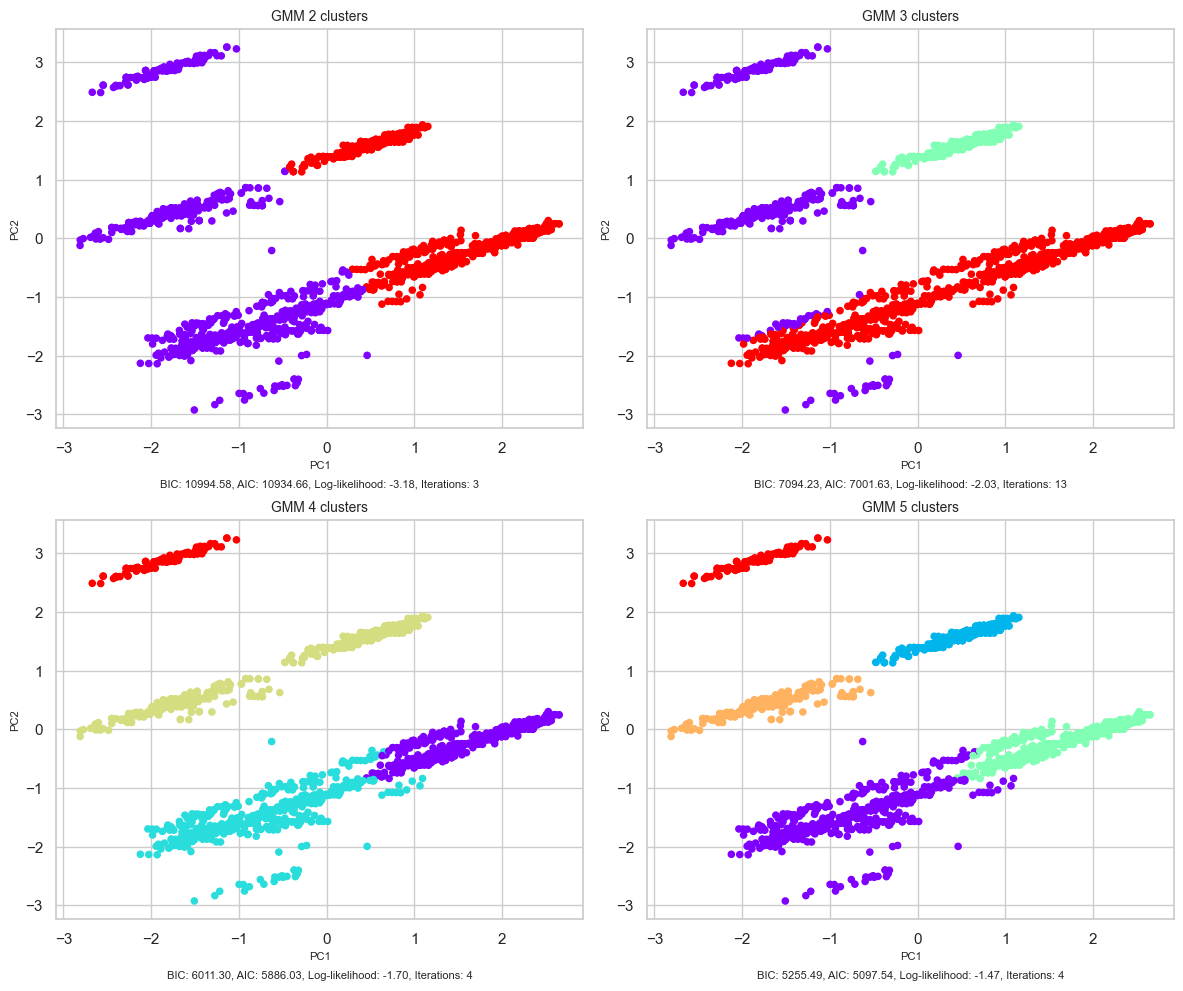

In [2459]:
# Plot PCA diagrams 
fig, axes = plt.subplots((len(range_n_clusters)+ 1) // 2, 2, figsize=(12, 10))
axes = axes.flatten()

# Iterate over GMM results and plot each clustering
for i, (n_clusters, labels, silhouette_avg, bic, aic, log_likelihood, n_iter) in enumerate(gmm_results):
    ax = axes[i]  # Select the subplot for the current result
    
    # Scatter plot of PCA-reduced data with clusters
    ax.scatter(gmm_data[:, 0], gmm_data[:, 1], c=labels, s=20, cmap='rainbow')
    ax.set_title(f"GMM {n_clusters} clusters", fontsize=10)
    ax.set_xlabel('PC1', fontsize=8) # Label for the first principal component
    ax.set_ylabel('PC2', fontsize=8) # Label for the second principal component

    # Display BIC, AIC, log-likelihood, and iterations
    ax.text(0.5, -0.15, f"BIC: {bic:.2f}, AIC: {aic:.2f}, Log-likelihood: {log_likelihood:.2f}, Iterations: {n_iter}",
            ha="center", fontsize=8, transform=ax.transAxes)

plt.tight_layout()

# Display the plots
plt.show()

##### **4. DBScan Clustering**

eps=0.3, min_samples=5 -> Clusters: 7, Noise points: 28
eps=0.3, min_samples=10 -> Clusters: 2, Noise points: 72
eps=0.3, min_samples=15 -> Clusters: 2, Noise points: 90
eps=0.5, min_samples=5 -> Clusters: 6, Noise points: 11
eps=0.5, min_samples=10 -> Clusters: 5, Noise points: 21
eps=0.5, min_samples=15 -> Clusters: 2, Noise points: 60
eps=0.7, min_samples=5 -> Clusters: 4, Noise points: 11
eps=0.7, min_samples=10 -> Clusters: 4, Noise points: 19
eps=0.7, min_samples=15 -> Clusters: 3, Noise points: 42


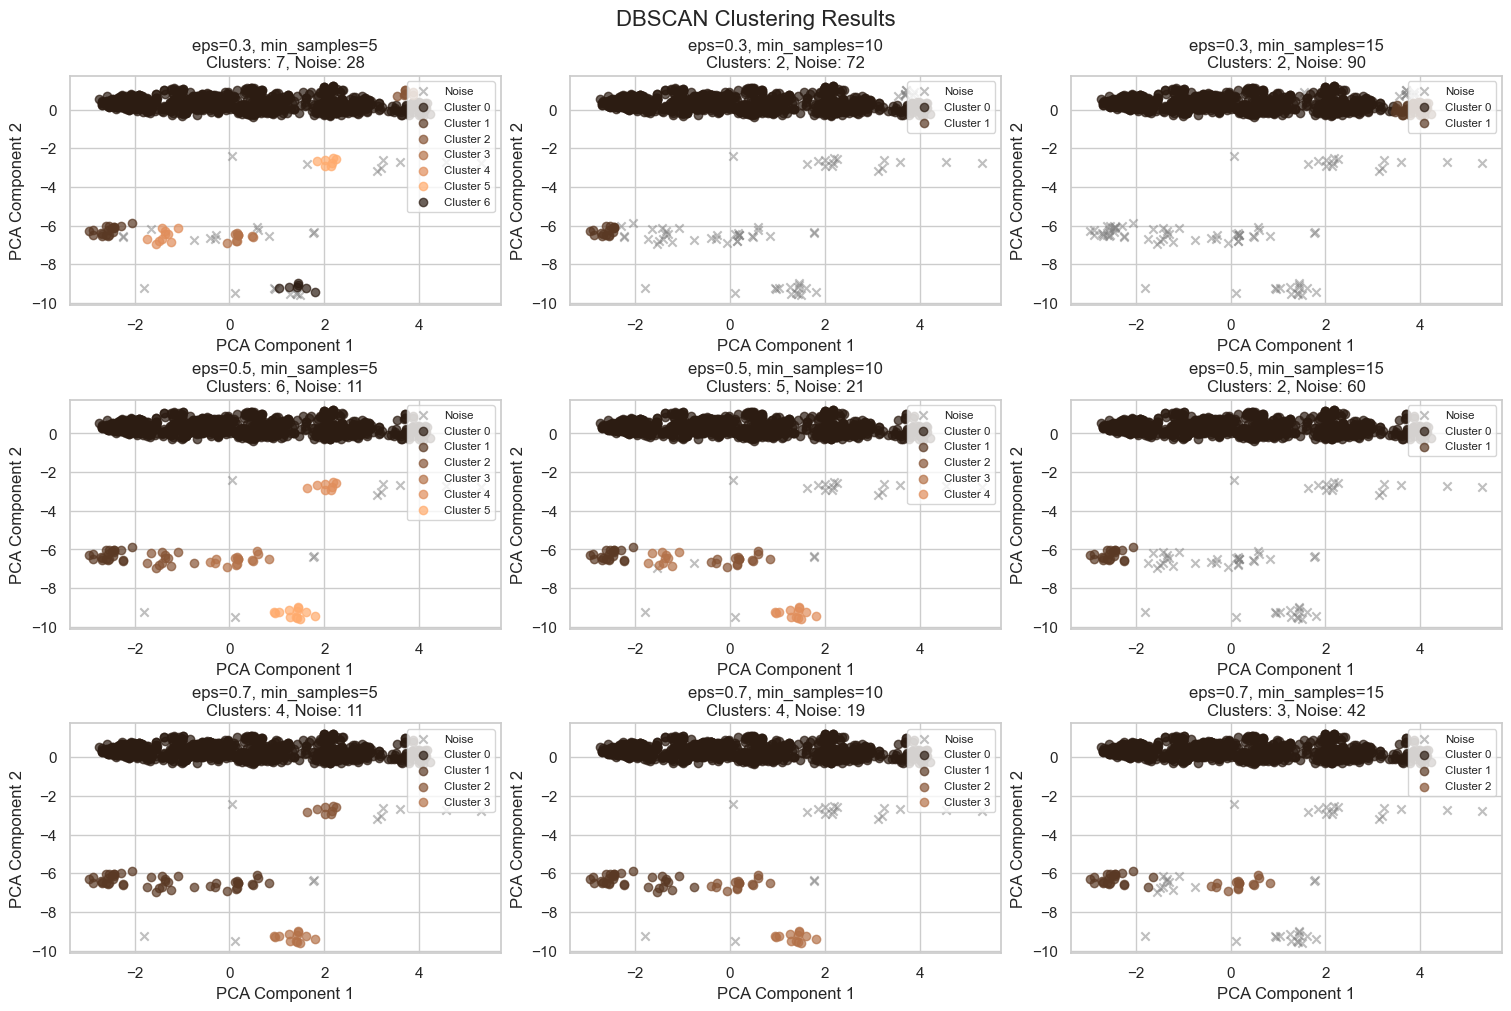

In [2460]:
# Set PCA-reduced data for DBSCAN clustering
dbscan_data = pca_data

# Parameters to iterate over
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

# Create a grid layout
n_rows = len(eps_values)
n_cols = len(min_samples_values)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Loop through combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Perform DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(dbscan_data)
        
        # Count clusters and noise points
        n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
        n_noise = list(y_dbscan).count(-1)
        
        # Print cluster info
        print(f"eps={eps}, min_samples={min_samples} -> Clusters: {n_clusters}, Noise points: {n_noise}")
        
        # Plot in the corresponding subplot
        ax = axes[i, j]
        clusters = np.unique(y_dbscan)
        for cluster in clusters:
            row_ix = np.where(y_dbscan == cluster)
            if cluster == -1:
                # Noise points
                ax.scatter(dbscan_data[row_ix, 0], dbscan_data[row_ix, 1], color='gray', marker='x', label='Noise', alpha=0.5)
            else:
                # Cluster points
                ax.scatter(dbscan_data[row_ix, 0], dbscan_data[row_ix, 1], label=f'Cluster {cluster}', alpha=0.7)
        
        # Titles and labels for each subplot
        ax.set_title(f"eps={eps}, min_samples={min_samples}\nClusters: {n_clusters}, Noise: {n_noise}")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.grid(True)
        ax.legend(loc='upper right', fontsize='x-small')

# Display all plots together
plt.suptitle("DBSCAN Clustering Results", fontsize=16)
plt.show()

#### Analysis of Clustering without Flavor Profile Features

This clustering analysis is performed without flavor profile features. K-Means achieves 4 clusters with a good Silhouette Score of 0.62, aligning well with the ground truth. DBSCAN also identifies 4 clusters with 11 noise points, effectively handling dense regions but requiring precise parameter tuning. Hierarchical clustering and GMM over-cluster slightly, with 5 clusters, though Hierarchical clustering achieves a higher Silhouette Score of 0.67.

K-Means appears to be the best as it aligns directly with the ground truth and provides interpretable results. DBSCAN follows closely but is more sensitive to parameter tuning.


### **Step 7: Classification**

#### **Imports**

In [2461]:
%pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2462]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


#### **Label Encoding For Target Feature**

In [2463]:
# Drop the 'Quality' and 'rating' columns from the data_encoded DataFrame to prepare for model training
training_data = data_encoded.drop(['Quality','rating'], axis=1)

# Display the column names of the resulting training_data DataFrame
training_data.columns

Index(['cocoa_percent', 'counts_of_ingredients', 'beans', 'cocoa_butter',
       'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar',
       'bean_continent_Africa', 'bean_continent_Asia',
       'bean_continent_Australia', 'bean_continent_North America',
       'bean_continent_South America', 'bean_continent_Unknown',
       'company_continent_Africa', 'company_continent_Asia',
       'company_continent_Australia', 'company_continent_Europe',
       'company_continent_North America', 'company_continent_South America'],
      dtype='object')

In [2464]:
# Assign the features to the variable 'X' which will be used for classification
X = training_data

# Encoding of the categorical target feature
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_encoded['Quality'])  # Converts 'Quality' column to numeric labels

In [2465]:
# Display the first 5 rows of the 'training_data'
training_data.head()

cocoa_percent  counts_of_ingredients  beans  cocoa_butter  vanilla  \
0           76.0                      3      1             1        0   
1           76.0                      3      1             1        0   
2           76.0                      3      1             1        0   
3           63.0                      4      1             1        0   
4           70.0                      4      1             1        0   

   lecithin  salt  sugar  sweetener_without_sugar  bean_continent_Africa  ...  \
0         0     0      1                        0                      1  ...   
1         0     0      1                        0                      0  ...   
2         0     0      1                        0                      1  ...   
3         1     0      1                        0                      0  ...   
4         1     0      1                        0                      0  ...   

   bean_continent_Australia  bean_continent_North America  \
0                         0                             0   
1                         0                             1   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   bean_continent_South America  bean_continent_Unknown  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             1                       0   
4                             1                       0   

   company_continent_Africa  company_continent_Asia  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   company_continent_Australia  company_continent_Europe  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         1   
4                            0                         1   

   company_continent_North America  company_continent_South America  
0                                1                                0  
1                                1                                0  
2                                1                                0  
3                                0                                0  
4                                0                                0  

[5 rows x 21 columns]

#### **Handling Class Imbalance using SMOTE**

In [2466]:
# Calculate the current distribution of target classes
class_counts = pd.Series(y).value_counts()
print("Current class distribution:\n", class_counts)

Current class distribution:
 3    667
1    585
0    377
2     85
Name: count, dtype: int64


In [2467]:
# Initialize SMOTE for oversampling to balance the class distribution

# OVERSAMPLING
sampling_strategy_over = {
    label_encoder.transform(['Outstanding'])[0]: 400, # Increase 'Outstanding' class to 400 samples
    label_encoder.transform(['Disappointing'])[0]:600, # Increase 'Disappointing' class to 600 samples
    label_encoder.transform(['Highly Recommended'])[0]: 600, # Increase 'Highly Recommended' to 600 samples
    # label_encoder.transform(['Recommended'])[0]: 800 # originally 667 samples for 'Recommended'
}

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy=sampling_strategy_over, random_state=42)  # 'auto' balances all classes equally
X_resampled, y_resampled = smote.fit_resample(X, y)  # Resample the features and labels


# UNDERSAMPLING
sampling_strategy_under = {
    # label_encoder.transform(['Highly Recommended'])[0]: 500, # originally 585 samples for 'Highly Recommended'
    label_encoder.transform(['Recommended'])[0]: 600 # Reduce 'Recommended' class to 600 samples
}

# Apply Random Under-Sampling to balance the classes by reducing the size of the majority class
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled) # Resample after oversampling


In [2468]:
# Decode the numeric labels back to their original class labels
y_resampled_labels = label_encoder.inverse_transform(y_resampled)

# Count the occurrences of each class in the resampled dataset
unique, counts = np.unique(y_resampled_labels, return_counts=True)

# Print the class distribution after resampling
print(dict(zip(unique, counts)))

{'Disappointing': np.int64(600), 'Highly Recommended': np.int64(600), 'Outstanding': np.int64(400), 'Recommended': np.int64(600)}


#### **Splitting Data into Training and Testing set**

In [2469]:
# Split the resampled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

#### **Classification Algorithms**

##### **1. Decision Tress**

In [2470]:
# Import DecisionTreeClassifier and plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

**Without Hyperparameter Tuning**

In [2471]:
# Train the decision tree model with limited depth
clf = DecisionTreeClassifier(random_state=42, max_depth=3)  
clf.fit(X_train, y_train)  # Fit the model to the training data

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Generate and print a classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

Decision Tree Accuracy: 0.30

Classification Report:
                     precision    recall  f1-score   support

     Disappointing       0.36      0.26      0.30       195
Highly Recommended       0.28      0.79      0.41       174
       Outstanding       0.47      0.07      0.12       104
       Recommended       0.60      0.02      0.03       187

          accuracy                           0.30       660
         macro avg       0.43      0.28      0.21       660
      weighted avg       0.42      0.30      0.22       660



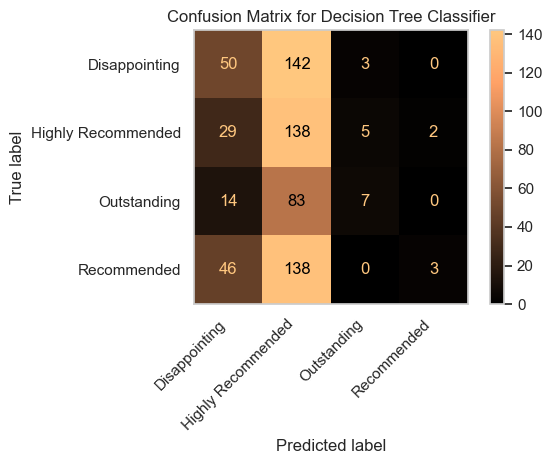

In [2472]:
# Compute the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=label_encoder.classes_, cmap='copper')

# Set title and rotate x-axis labels
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xticks(rotation=45, ha='right')  # Improved rotation for readability
plt.yticks(rotation=0)  # Keeps y-axis labels upright

# Remove gridlines for a cleaner look
plt.grid(False)  # Disable the gridlines

# Show the plot
plt.tight_layout()  # Ensures tight layout to avoid label overlap
plt.show()




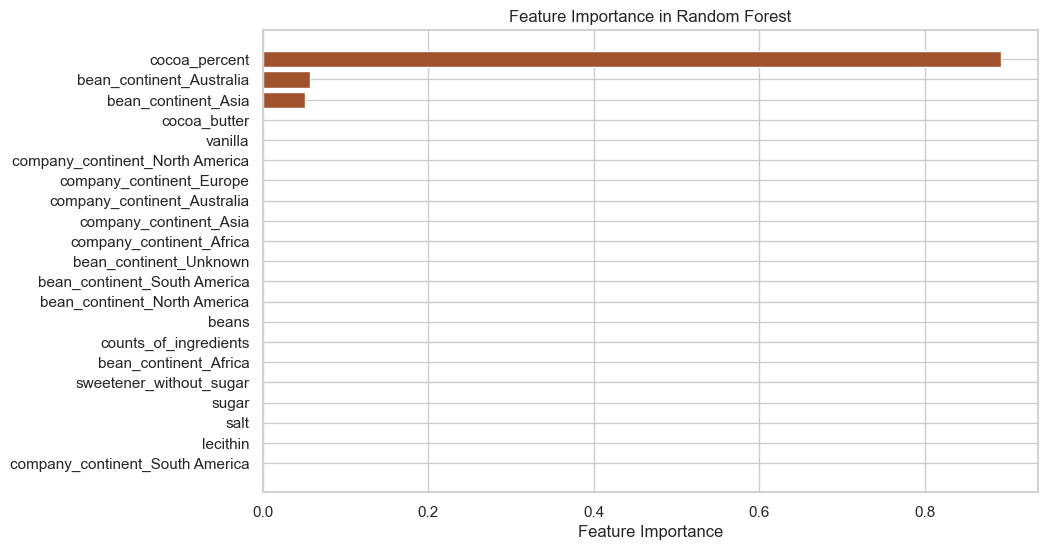

In [2473]:
# Create a DataFrame to store features and their corresponding importance scores
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6)) # Set the figure size for the plot
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='sienna')
plt.xlabel("Feature Importance") # Label for the x-axis
plt.title("Feature Importance in Random Forest") # Title of the plot

# Invert y-axis to display the most important feature on top 
plt.gca().invert_yaxis()  

# Show the plot
plt.show()

**With Hyperparameter Tuning**

In [2474]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None], # Depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4], # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Split quality measures
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
print("Best parameters found for Decision Tree:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

# Evaluate on the test set using the best model
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy with Tuned Parameters: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report for Tuned Decision Tree:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))


Best parameters found for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Accuracy with Tuned Parameters: 0.41

Classification Report for Tuned Decision Tree:
                     precision    recall  f1-score   support

     Disappointing       0.50      0.48      0.49       195
Highly Recommended       0.31      0.33      0.32       174
       Outstanding       0.49      0.66      0.56       104
       Recommended       0.34      0.27      0.30       187

          accuracy                           0.41       660
         macro avg       0.41      0.44      0.42       660
      weighted avg       0.40      0.41      0.40       660



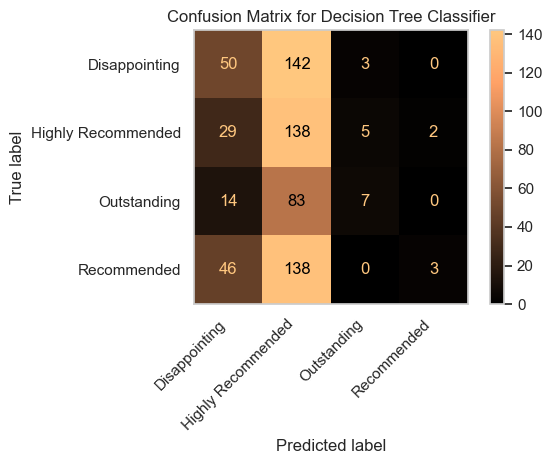

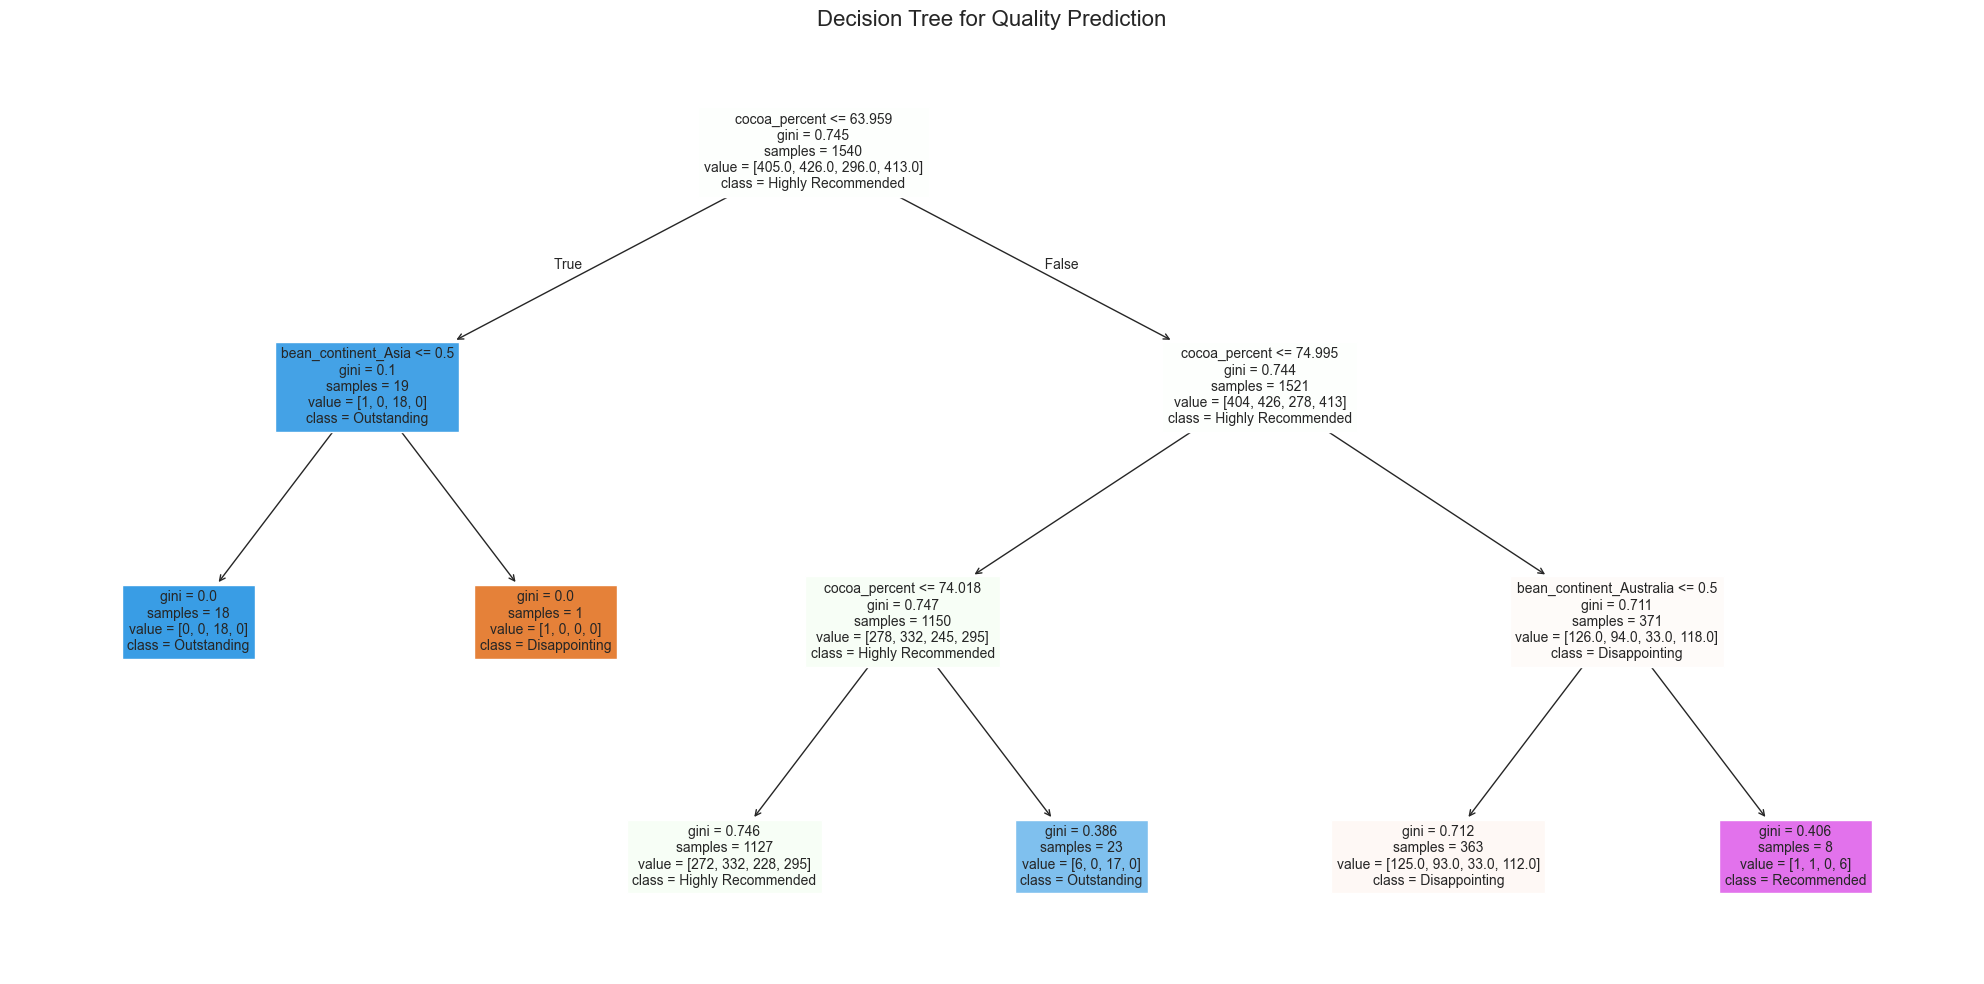

In [2475]:
# Confusion matrix display 
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=label_encoder.classes_, cmap='copper')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  

plt.grid(False)

# Show the plot
plt.tight_layout()  
plt.show()

# Plot the decision tree 
plt.figure(figsize=(20, 10))  
plot_tree(clf, filled=True, feature_names=training_data.columns, class_names=label_encoder.classes_, fontsize=10)
plt.title("Decision Tree for Quality Prediction", fontsize=16)  
plt.tight_layout()  
plt.show()


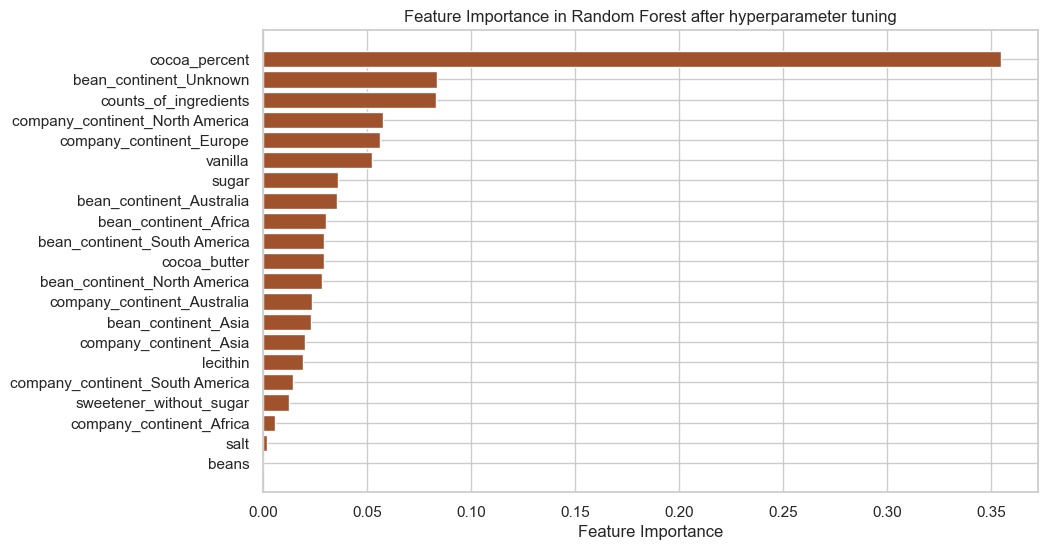

In [2476]:
# Get feature importances from the best tuned model
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_clf.feature_importances_})

# Sort the feature importances in descending order to display the most important features at the top
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6)) # Set the figure size for the plot
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='sienna')
plt.xlabel("Feature Importance")  # Label for the x-axis
plt.title("Feature Importance in Random Forest after hyperparameter tuning")  # Title for the plot

# Invert y-axis to display the most important feature on top
plt.gca().invert_yaxis()  

# Display the plot
plt.show()

**Cross Validation**

In [2477]:
# Perform 5-fold cross-validation on the Decision Tree Classifier
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42, max_depth=3), X, y, cv=5)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores for Decision Tree:", cv_scores)

# Print the mean accuracy across all folds
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores for Decision Tree: [0.36151603 0.34402332 0.39067055 0.39941691 0.36842105]
Mean Cross-Validation Accuracy: 0.3728095749578027


##### **2. Random Forest**

In [2478]:
# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

**Without Hyperparameter Tuning**

In [2479]:
# Initialize RandomForestClassifier with default parameters
rf_clf = RandomForestClassifier(random_state=42)  # Default hyperparameters

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy without Hyperparameter Tuning: {accuracy:.2f}")
print("\nClassification Report for Untuned Random Forest:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

Random Forest Accuracy without Hyperparameter Tuning: 0.40

Classification Report for Untuned Random Forest:
                     precision    recall  f1-score   support

     Disappointing       0.49      0.38      0.43       195
Highly Recommended       0.30      0.32      0.31       174
       Outstanding       0.49      0.69      0.58       104
       Recommended       0.37      0.35      0.36       187

          accuracy                           0.40       660
         macro avg       0.41      0.43      0.42       660
      weighted avg       0.40      0.40      0.40       660



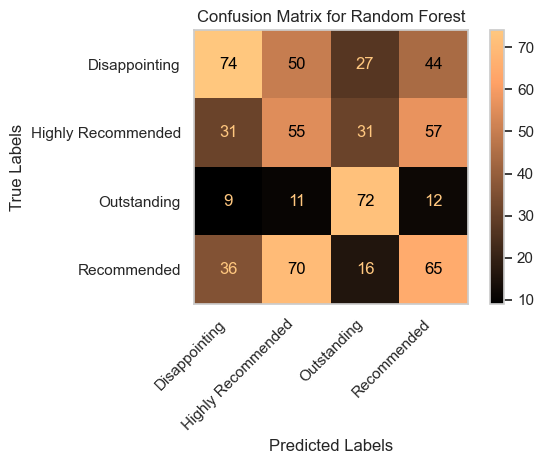

In [2480]:
# Generate and display the confusion matrix using RandomForest model (rf_clf)
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=label_encoder.classes_, cmap="copper")

# Add title 
plt.title("Confusion Matrix for Random Forest")

# Rotate x-axis 
plt.xticks(rotation=45, ha='right')

# Rotate y-axis 
plt.yticks(rotation=0)

# Add the class labels to both x and y axes
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.grid(False)

# Display the plot
plt.tight_layout()  
plt.show()



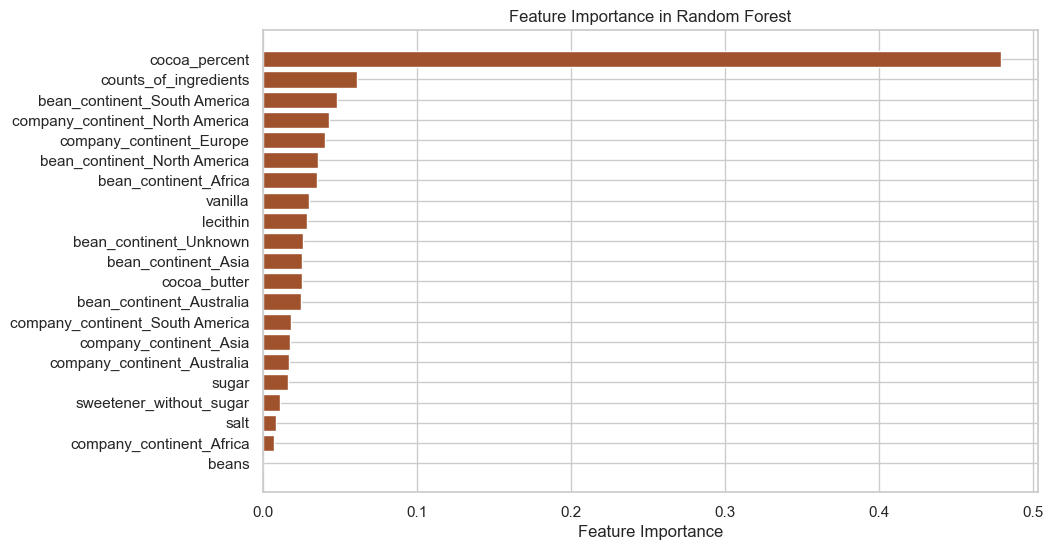

In [2481]:
# Get feature importances from the Random Forest model (rf_clf)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_clf.feature_importances_})

# Sort the features based on their importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='sienna')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top

# Display the plot
plt.show()

**With Hyperparameter Tuning**

In [2482]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [2483]:
# Initialize GridSearchCV with RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and set up the best model
print("Best parameters found for Random Forest:", grid_search_rf.best_params_)
best_rf_clf = grid_search_rf.best_estimator_

# Make predictions and evaluate on the test set using the best model
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy with Tuned Parameters: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report for Tuned Random Forest:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

Best parameters found for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy with Tuned Parameters: 0.39

Classification Report for Tuned Random Forest:
                     precision    recall  f1-score   support

     Disappointing       0.48      0.31      0.38       195
Highly Recommended       0.31      0.33      0.32       174
       Outstanding       0.42      0.74      0.54       104
       Recommended       0.38      0.34      0.36       187

          accuracy                           0.39       660
         macro avg       0.40      0.43      0.40       660
      weighted avg       0.40      0.39      0.38       660



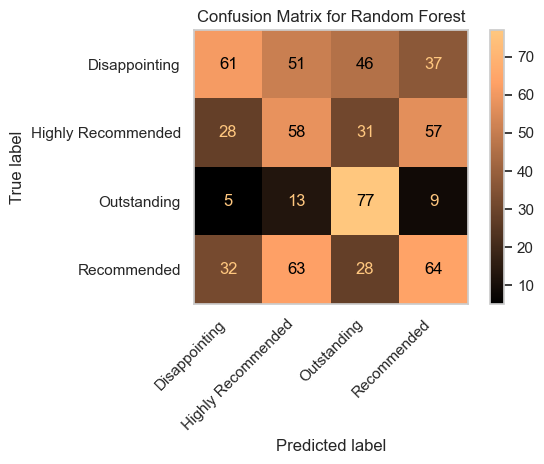

In [2484]:
# Generate and display the confusion matrix using the best-trained Random Forest classifier (best_rf_clf)
disp = ConfusionMatrixDisplay.from_estimator(best_rf_clf, X_test, y_test, display_labels=label_encoder.classes_, cmap="copper")

# Add title
plt.title("Confusion Matrix for Random Forest")

# Rotate x-axis labels 
plt.xticks(rotation=45, ha='right')

plt.grid(False)

# Display the plot
plt.tight_layout()  
plt.show()


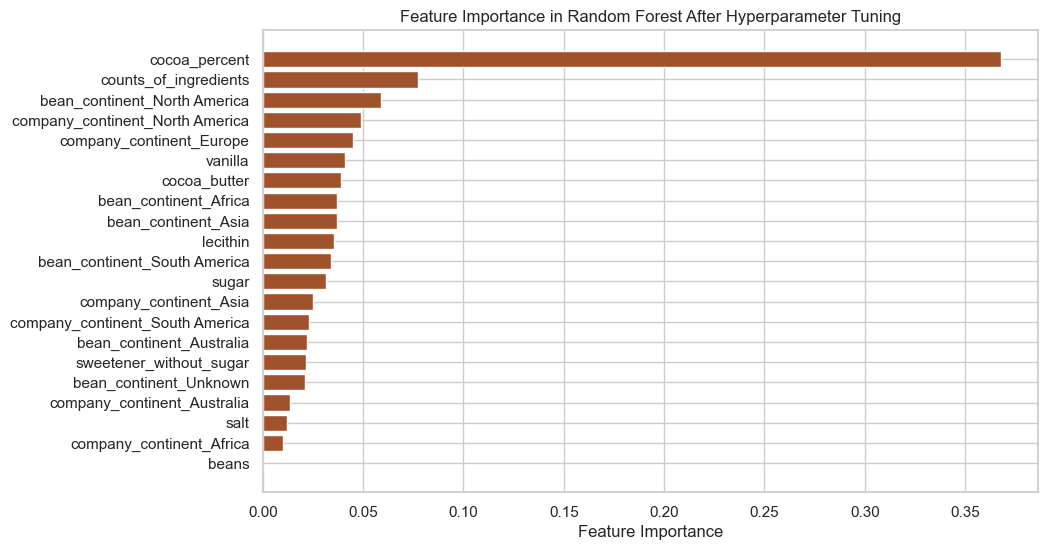

In [2485]:
# Get feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf_clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='sienna')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest After Hyperparameter Tuning")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top

# Display the plot
plt.show()

**Cross Validation**

In [2486]:
# Cross-validate the best model using 5-fold cross-validation on the training set
cv_scores = cross_val_score(best_rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Accuracy Scores for Tuned Random Forest:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores for Tuned Random Forest: [0.41233766 0.43831169 0.42532468 0.43831169 0.42207792]
Mean Cross-Validation Accuracy: 0.42727272727272736


##### **3. K-Nearest Neighbour**

**Standardizing data for K-NN**

In [2487]:
# Standardize the training and test data
scalar = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scalar.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scalar.transform(X_test) 

In [2488]:
from sklearn.neighbors import KNeighborsClassifier

**Without Hyperparameter Tuning**

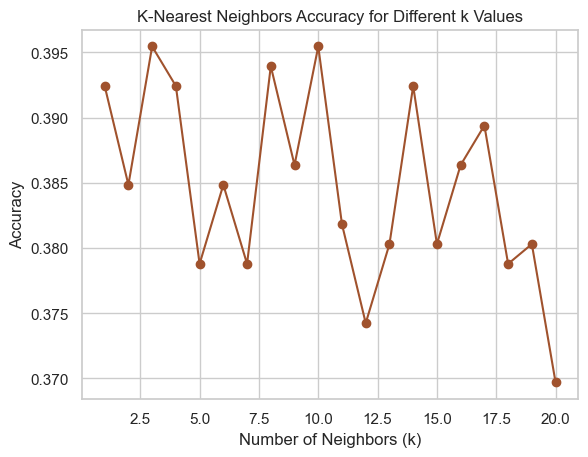

In [2489]:
# Try different values of k and store the results
k_values = range(1, 21) # Define the range of k values (from 1 to 20)
accuracies = [] # List to store accuracy for each k value

# Loop through the range of k values to evaluate the performance of KNN for each k
for k in k_values:
    # Initialize the KNN classifier with the current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the scaled training data
    knn_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = knn_model.predict(X_test_scaled)

    # Calculate the accuracy of the model and store it in the accuracies list
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for each value of k
plt.plot(k_values, accuracies, marker='o', color='sienna')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K-Nearest Neighbors Accuracy for Different k Values")

# Display the plot
plt.show()

In [2490]:
# Set k to 3, which is the best value of k determined from previous experiments
k = 3 

# Initialize the KNN classifier with the selected value of k
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model using the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data using the trained model
y_pred = knn_model.predict(X_test_scaled)

In [2491]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.55      0.46       195
           1       0.31      0.20      0.24       174
           2       0.54      0.69      0.61       104
           3       0.33      0.25      0.28       187

    accuracy                           0.40       660
   macro avg       0.39      0.42      0.40       660
weighted avg       0.38      0.40      0.38       660



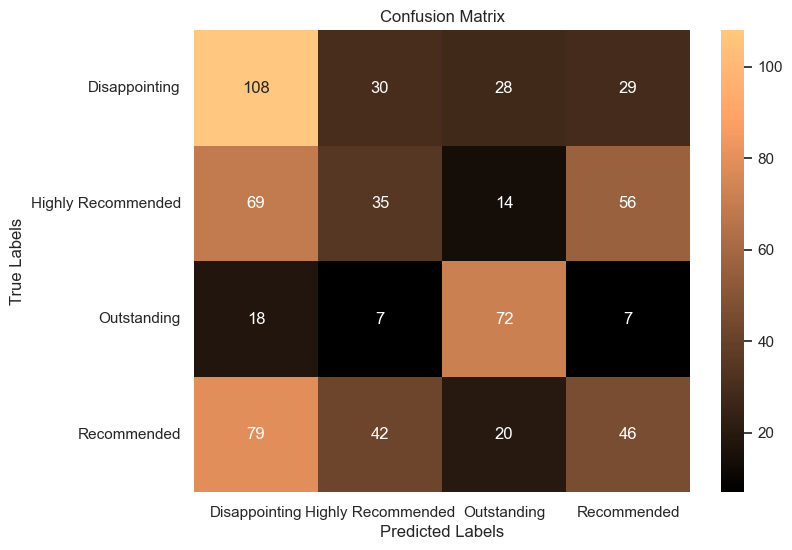

In [2492]:
# Compute the confusion matrix to compare the true labels (y_test) with the predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="copper", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Set labels and title for the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

**With Hyperparameter Tuning**

In [2493]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV with KNeighborsClassifier
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Display the best parameters and set up the best model
print("Best parameters found for KNN:", grid_search_knn.best_params_)
best_knn_model = grid_search_knn.best_estimator_

Best parameters found for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [2494]:
# Use the best model found by GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Predict on the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy with Tuned Parameters: {accuracy:.2f}")
print("\nClassification Report for Tuned KNN:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

KNN Accuracy with Tuned Parameters: 0.42

Classification Report for Tuned KNN:
                     precision    recall  f1-score   support

     Disappointing       0.47      0.47      0.47       195
Highly Recommended       0.32      0.34      0.33       174
       Outstanding       0.48      0.71      0.58       104
       Recommended       0.39      0.26      0.31       187

          accuracy                           0.42       660
         macro avg       0.42      0.45      0.42       660
      weighted avg       0.41      0.42      0.41       660



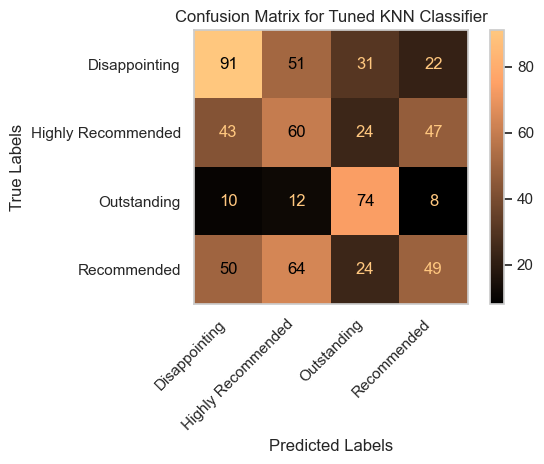

In [2495]:
# Display the confusion matrix for the tuned KNN classifier
disp = ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test_scaled, y_test, display_labels=label_encoder.classes_, cmap='copper')

# Add title to the confusion matrix plot
plt.title("Confusion Matrix for Tuned KNN Classifier")

# Rotate x-axis labels 
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels 
plt.yticks(rotation=0)

# Set the x and y axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the class labels 
plt.gca().set_xticklabels(label_encoder.classes_, rotation=45, ha='right')
plt.gca().set_yticklabels(label_encoder.classes_, rotation=0)


plt.grid(False)

# Display the plot
plt.tight_layout()  
plt.show()






**Cross Validation**

In [2496]:
# Perform cross-validation with the best KNN model using 5-fold cross-validation on the training set
cv_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Accuracy Scores for Tuned KNN:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores for Tuned KNN: [0.42207792 0.39935065 0.38961039 0.40909091 0.37987013]
Mean Cross-Validation Accuracy: 0.4


##### **4. LightGBM**

In [2497]:
import lightgbm as lgb


**Without Hyperparameter Tuning**

In [2498]:
# Initialize the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(
    objective='multiclass', # Specifies multiclass classification
    num_class=len(set(y)),  # Number of unique classes in the target
    learning_rate=0.05,  # Step size at each iteration
    n_estimators=100, # Number of boosting iterations (trees)
    num_leaves=31  # Maximum number of leaves per tree
)

# Train the LightGBM model on the training data
lgb_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 18
[LightGBM] [Info] Start training from score -1.335651
[LightGBM] [Info] Start training from score -1.285098
[LightGBM] [Info] Start training from score -1.649178
[LightGBM] [Info] Start training from score -1.316090


Accuracy: 0.41
Classification Report:
                    precision    recall  f1-score   support

     Disappointing       0.52      0.42      0.46       195
Highly Recommended       0.31      0.33      0.32       174
       Outstanding       0.52      0.69      0.59       104
       Recommended       0.35      0.33      0.34       187

          accuracy                           0.41       660
         macro avg       0.42      0.44      0.43       660
      weighted avg       0.42      0.41      0.41       660



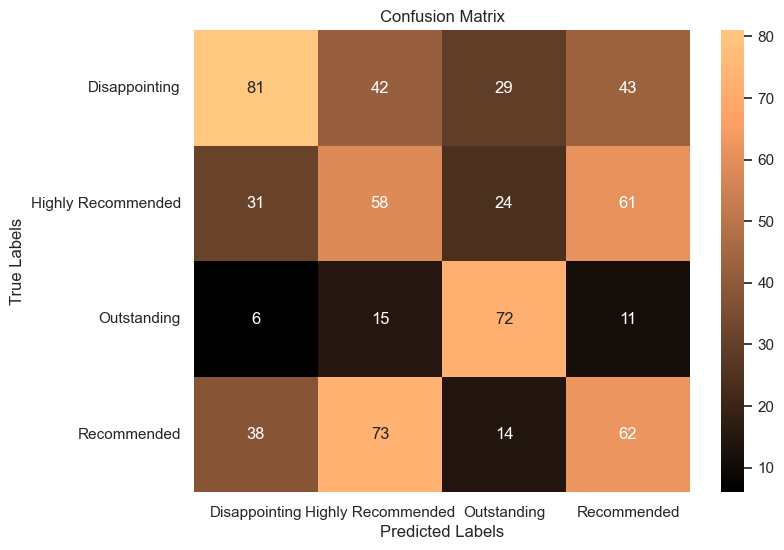

In [2499]:
# Evaluate the model's accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="copper", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

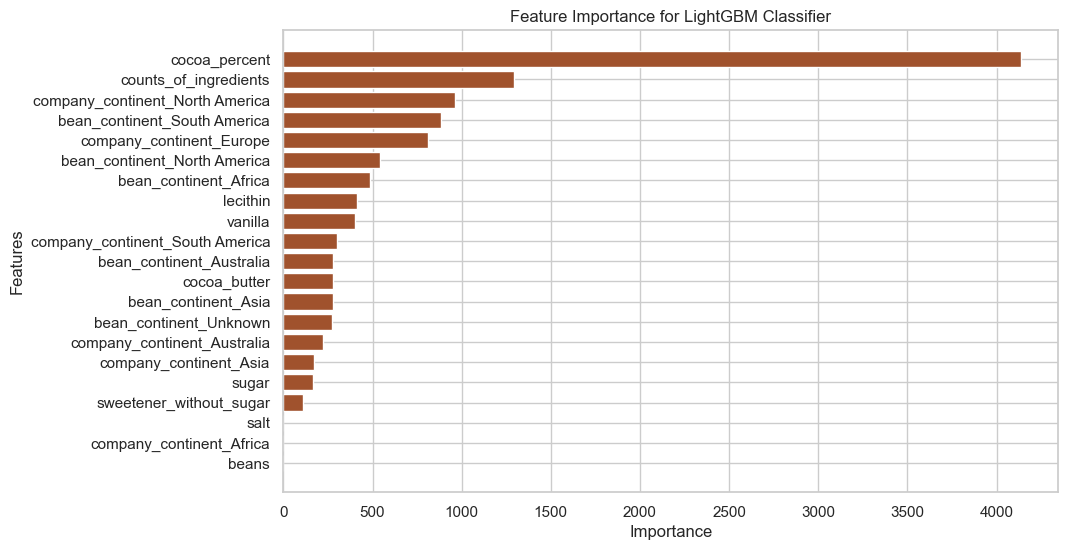

In [2500]:
# Extract feature importance from the trained LightGBM model (lgb_model)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Use feature names from the training set (X_train.columns)
    'Importance': lgb_model.feature_importances_  # Feature importance values from the LightGBM model
})

# Sort the feature importance values in descending order to display the most important features at the top
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='sienna')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for LightGBM Classifier")
plt.gca().invert_yaxis()  # Show the most important feature at the top

# Display the plot
plt.show()

**With Hyperparameter Tuning**

In [2501]:
# Define a basic hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.2],
    'num_leaves': [15, 31]
}

# Instantiate the LightGBM model
lgb_model = lgb.LGBMClassifier(objective='multiclass', random_state=42)

# Use StratifiedKFold for better handling of imbalanced classes
skf = StratifiedKFold(n_splits=3)

# Wrap the model with GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_lgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_encoded = best_lgb_model.predict(X_test)

# Decode predictions back to original labels for evaluation
y_pred = label_encoder.inverse_transform(y_pred_encoded)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 1026, number of used features: 18
[LightGBM] [Info] Start training from score -1.335001
[LightGBM] [Info] Start training from score -1.284449
[LightGBM] [Info] Start training from score -1.650219
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM

LightGBM Model with Hyperparameter Tuning Evaluation:
Accuracy: 0.39

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.35      0.40       195
           1       0.30      0.34      0.32       174
           2       0.45      0.75      0.56       104
           3       0.34      0.27      0.30       187

    accuracy                           0.39       660
   macro avg       0.39      0.43      0.40       660
weighted avg       0.39      0.39      0.38       660



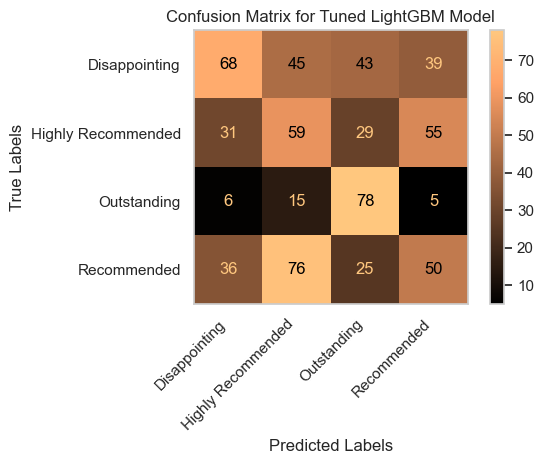

In [2502]:
# Evaluate the best model
print("LightGBM Model with Hyperparameter Tuning Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_encoded):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_encoded))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_encoded)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix 
disp.plot(cmap="copper")

# Add title to the confusion matrix plot
plt.title("Confusion Matrix for Tuned LightGBM Model")

# Rotate the x-axis labels 
plt.xticks(rotation=45, ha='right')

# Rotate the y-axis labels 
plt.yticks(rotation=0)

# Set the labels for x and y axes
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.gca().set_xticklabels(label_encoder.classes_, rotation=45, ha='right')
plt.gca().set_yticklabels(label_encoder.classes_, rotation=0)

plt.grid(False)

# Display the plot
plt.tight_layout()  
plt.show()


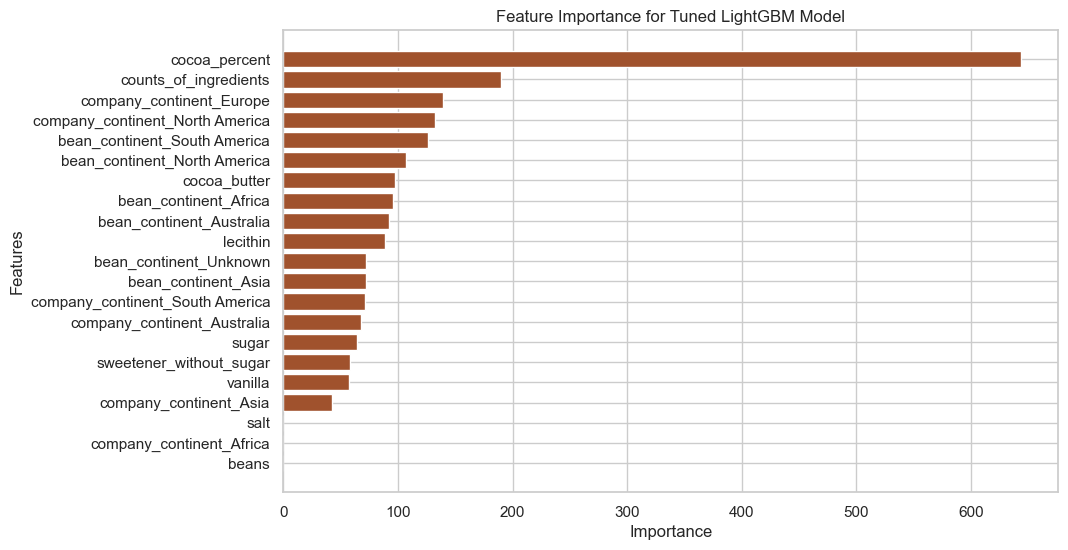

In [2503]:
# Extract feature importance from the best model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_lgb_model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='sienna')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Tuned LightGBM Model")
plt.gca().invert_yaxis()  # Show the most important feature at the top
plt.show()

#### Overall Classification Results without Flavor Profile

This predictive analysis is conducted without flavor profile features. The accuracies of the models range from 0.39 to 0.41. Decision Trees and KNN achieved the highest accuracy of 0.41, delivering balanced results across most classes. LightGBM excelled in predicting the "Outstanding" class (recall: 0.75) but struggled with others, while Random Forest demonstrated slightly higher F1-scores but lacked consistency. The exclusion of flavor profile features appears to reduce the models' ability to differentiate effectively between classes. Among the models, Decision Trees provide the most balanced overall performance in this scenario.  

### **Step 8: Neural Networks**

#### **Imports**

In [2504]:
!pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2505]:
# Import Required Libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv1D, Input, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#### **Standardizing the data**

In [2506]:
# Standardize the training and test data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Encode the target labels using LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test labels using the fitted encoder
y_test_encoded = label_encoder.transform(y_test)

#### **Multi-Layer Perceptron**

In [2507]:
# Initialize the MLP Classifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # Activation function for the hidden layer
    solver='adam',              # Optimization algorithm
    random_state=42,            # Ensures reproducibility
    max_iter=900                # Maximum number of iterations for training
)

# Train the MLP model on the scaled training data
mlp_model.fit(X_train_scaled, y_train_encoded)

MLPClassifier(max_iter=900, random_state=42)

MLP Classifier Model Evaluation:
Accuracy: 0.39

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.35      0.40       195
           1       0.30      0.34      0.32       174
           2       0.45      0.75      0.56       104
           3       0.34      0.27      0.30       187

    accuracy                           0.39       660
   macro avg       0.39      0.43      0.40       660
weighted avg       0.39      0.39      0.38       660



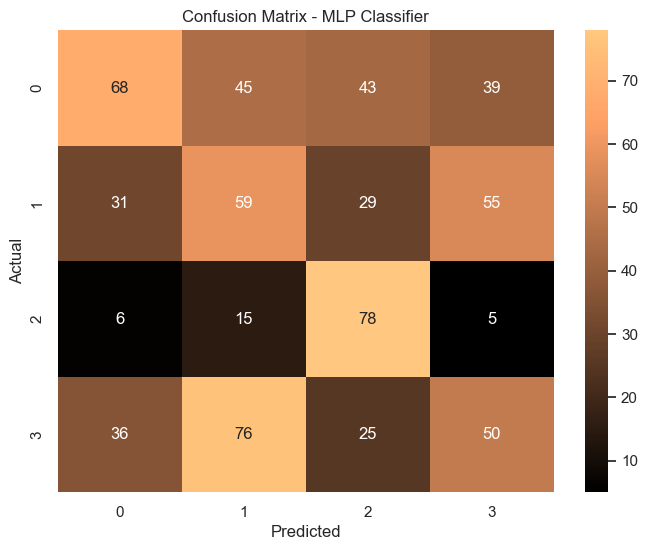

In [2508]:
# Decode the predicted labels if numeric
y_pred_decoded = (
    label_encoder.inverse_transform(y_pred_encoded)
    if isinstance(y_pred_encoded[0], int)
    else y_pred_encoded
)

# Decode the test labels if numeric
y_test_decoded = (
    label_encoder.inverse_transform(y_test_encoded)
    if isinstance(y_test_encoded[0], int)
    else y_test_encoded
)

# Ensure target names are strings
target_names = [str(name) for name in label_encoder.classes_]

# Evaluate the model
print("MLP Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_decoded, y_pred_decoded):.2f}")


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper',
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - MLP Classifier')
plt.grid(False)

plt.show()





#### **Convolutional Neural Network**

In [2509]:
# Reshape for Conv1D: Add a channel dimension (samples, timesteps, channels)
X_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
X_test_reshaped = np.expand_dims(X_test_scaled, axis=2)

# One-hot encode the labels (if multi-class)
num_classes = len(np.unique(y_train))  # Determine the number of classes
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


In [2510]:
# Define the CNN model with additional dropout
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Input shape: (timesteps, channels)
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # 1D convolution layer with 32 filters
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Another 1D convolution layer with 64 filters
    Flatten(),  # Flatten the output for fully connected layers
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dropout(0.6),  # Dropout layer to prevent overfitting, with 60% dropout rate
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the CNN model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with reduced learning rate
    loss='categorical_crossentropy',     # Loss function for multi-class classification
    metrics=['accuracy']                 # Evaluate using accuracy metric
)

# Early stopping callback to stop training when validation accuracy stops improving
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # Monitor validation accuracy
    patience=5,                   # Stop after 5 epochs with no improvement
    restore_best_weights=True     # Restore weights from the best epoch
)

# Learning rate scheduler callback to reduce learning rate if validation accuracy plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',       # Monitor validation accuracy
    factor=0.5,                   # Reduce learning rate by a factor of 0.5
    patience=3,                   # Wait for 3 epochs before reducing
    min_lr=1e-5                   # Set a minimum learning rate
)

# Train the CNN model
cnn_history = model.fit(
    X_train_reshaped,            # Input data: reshaped training features
    y_train_encoded,             # Target labels: one-hot encoded
    epochs=50,                   # Maximum number of epochs
    batch_size=32,               # Number of samples per batch
    validation_split=0.2,        # Use 20% of training data for validation
    verbose=1,                   # Display training progress
    callbacks=[early_stopping, lr_scheduler]  # Add callbacks for early stopping and learning rate reduction
)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2891 - loss: 1.3760 - val_accuracy: 0.3279 - val_loss: 1.3283 - learning_rate: 0.0010
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3531 - loss: 1.3192 - val_accuracy: 0.3864 - val_loss: 1.2848 - learning_rate: 0.0010
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3630 - loss: 1.2872 - val_accuracy: 0.3961 - val_loss: 1.2450 - learning_rate: 0.0010
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 1.2743 - val_accuracy: 0.3896 - val_loss: 1.2180 - learning_rate: 0.0010
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4205 - loss: 1.1937 - val_accuracy: 0.3896 - val_loss: 1.1996 - learning_rate: 0.0010
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3860 - loss: 1.2099 - val_accuracy: 0.4188 - val_loss: 1.1879 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3792 - loss: 1.2241 - val_accuracy: 

In [2511]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.3919 - loss: 1.2098
Test Accuracy: 0.3939


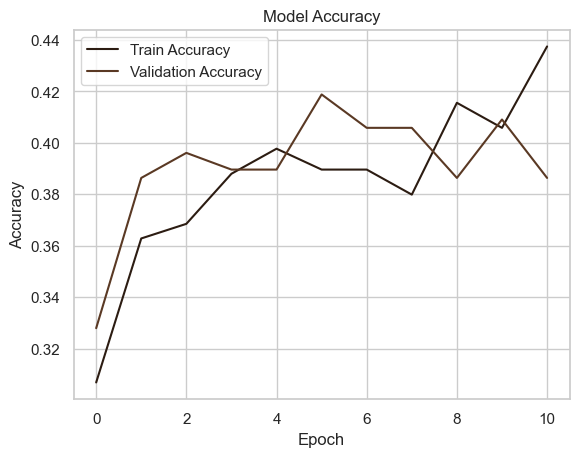

In [2512]:
# Plot the accuracy of the CNN model for each epoch
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy

# Add a legend to the plot to differentiate between the training and validation accuracy curves
plt.legend()

# Add a title to the plot
plt.title('Model Accuracy')

# Label the x-axis as 'Epoch', representing the number of training iterations
plt.xlabel('Epoch')

# Label the y-axis as 'Accuracy', representing the accuracy score
plt.ylabel('Accuracy')

# Display the plot
plt.show()


In [2513]:
# Predict class probabilities on the test set
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded test labels back to class labels
y_true = np.argmax(y_test_encoded, axis=1)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.29      0.35       195
           1       0.34      0.46      0.39       174
           2       0.48      0.73      0.58       104
           3       0.34      0.26      0.29       187

    accuracy                           0.39       660
   macro avg       0.40      0.43      0.40       660
weighted avg       0.39      0.39      0.38       660



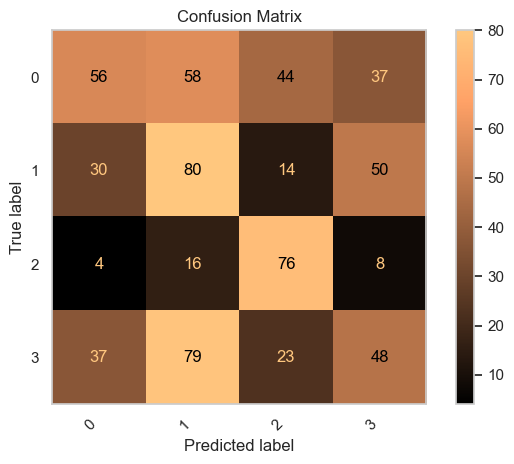

In [ ]:

target_names = [str(class_name) for class_name in label_encoder.classes_]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names)) 

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix with the correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix with 'copper' colormap
disp.plot(cmap=plt.cm.copper)

# Set the title
plt.title('Confusion Matrix')

# Set the labels explicitly for the x and y axes to ensure class names are displayed
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=0)

# Optionally, remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


#### Overall Neural Network Results

Without flavor profile features, MLP achieved 0.39 accuracy . It performs well in the "Outstanding" class (F1-score: 0.56). CNN had 0.37 accuracy, with strong recall for "Outstanding" (0.74) but struggled with precision. Both models performed poorly on the "Recommended" class, indicating limited differentiation due to missing flavor features. 